Описание данных
wellName Название скважины

datasetName Название набора данных

MD Измеренная глубина

BK Боковой каротаж (сопротивление)

Facies Фация (свойство)

GR Гамма-каротаж

LIT Литология

NKTB Нейтронный каротаж

SP Метод потенциалов собственной поляризации

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале

Нужно определять фации в коллеторах (LIT = 4)

1 – глина

2 – алевролит

5- плотная порода

6 - уголь

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале, но не выше 2000 м (MD>2000)

Самые основные конечно – GR и SP, их форму геологи учитывают для определения условий осадконакопления, можно будет попробовать оценить форму кривых, а не значения параметра) Единственный нюанс – пока в таблице всего 19 скважин, но фации в них выделены наиболее уверенно. Ну и судя по всему, информация с MD < 2000 не принципиальна

SP (каротаж естественной поляризации)
GR (гамма каротаж)
DT (акустический каротаж)
Density (плотностной каротаж)

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lasio
from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
def get_for_learn_clean_df(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    #feature = feature[feature["Facies"] >= -999]
    feature = feature[feature["BK"] >= -999]
    feature = feature[feature["SP"] >= -999]
    return feature


for_ml = get_for_learn_clean_df(pd.read_csv('TRAIN18PRED.csv', sep=';'))
display(for_ml.describe())
display(for_ml)
#display(for_ml[for_ml["Facies"] > -999].describe())

MD            BK             GR            LIT  \
count  469828.000000  4.698280e+05  469828.000000  393543.000000   
mean     2252.548300  5.467048e+01    -620.433207   -6082.336975   
std       319.475608  1.745306e+04    2430.537840    4881.611953   
min      1600.400000  0.000000e+00   -9999.000000   -9999.000000   
25%      1989.600000  4.945000e+00       6.570000   -9999.000000   
50%      2249.600000  6.550000e+00       8.320000   -9999.000000   
75%      2507.200000  8.490000e+00      10.400000       1.000000   
max      3169.600000  9.585299e+06     164.851000       6.000000   

                NKTB             SP  
count  469828.000000  469828.000000  
mean     -787.393870      92.809927  
std      2699.462546      38.196478  
min     -9999.000000    -894.662200  
25%         2.612000      66.995000  
50%         3.478518      93.940000  
75%         4.108000     121.090000  
max        30.500000     273.538800

wellName      MD      BK     GR  LAYER     LIT      NKTB     SP
0       spk1059L  1765.0    2.33   6.90  -9999 -9999.0  3.759897  72.09
1       spk1059L  1765.2    2.28   6.78  -9999 -9999.0  3.735977  70.69
2       spk1059L  1765.4    2.24   6.86  -9999 -9999.0  3.679740  71.18
3       spk1059L  1765.6    2.23   7.05  -9999 -9999.0  3.594239  69.51
4       spk1059L  1765.8    2.55   7.16  -9999 -9999.0  3.553020  68.44
5       spk1059L  1766.0    2.94   7.41  -9999 -9999.0  3.452698  67.90
6       spk1059L  1766.2    2.76   7.86  -9999 -9999.0  3.311324  68.15
7       spk1059L  1766.4    2.70   8.35  -9999 -9999.0  3.302620  68.99
8       spk1059L  1766.6    2.69   8.68  -9999 -9999.0  3.380386  69.74
9       spk1059L  1766.8    2.68   8.76  -9999 -9999.0  3.456919  70.32
10      spk1059L  1767.0    2.66   8.95  -9999 -9999.0  3.494744  70.93
11      spk1059L  1767.2    2.65   8.86  -9999 -9999.0  3.561290  72.36
12      spk1059L  1767.4    2.65   8.43  -9999 -9999.0  3.618812  72.49
13      spk1059L  1767.6    2.64   8.10  -9999 -9999.0  3.553020  72.83
14      spk1059L  1767.8    2.77   8.06  -9999 -9999.0  3.519802  71.69
15      spk1059L  1768.0    2.78   8.27  -9999 -9999.0  3.553020  71.94
16      spk1059L  1768.2    2.69   8.45  -9999 -9999.0  3.536438  70.41
17      spk1059L  1768.4    2.67   8.39  -9999 -9999.0  3.494744  69.53
18      spk1059L  1768.6    2.49   8.24  -9999 -9999.0  3.486363  67.68
19      spk1059L  1768.8    2.33   8.02  -9999 -9999.0  3.573671  67.43
20      spk1059L  1769.0    2.32   7.87  -9999 -9999.0  3.719970  66.74
21      spk1059L  1769.2    2.33   7.77  -9999 -9999.0  3.947572  68.30
22      spk1059L  1769.4    2.66   7.62  -9999 -9999.0  4.243577  70.07
23      spk1059L  1769.6    5.80   7.34  -9999 -9999.0  4.732124  70.96
24      spk1059L  1769.8   37.52   6.89  -9999 -9999.0  5.471189  71.94
25      spk1059L  1770.0  187.23   6.21  -9999 -9999.0  6.299788  73.04
26      spk1059L  1770.2  275.87   5.89  -9999 -9999.0  6.832919  74.11
27      spk1059L  1770.4  334.71   5.80  -9999 -9999.0  7.022237  74.23
28      spk1059L  1770.6  208.19   5.78  -9999 -9999.0  7.060697  74.51
29      spk1059L  1770.8  136.61   5.62  -9999 -9999.0  6.996516  73.73
...          ...     ...     ...    ...    ...     ...       ...    ...
983801   spk963L  2802.2   12.30   8.47  UV1_3     NaN  2.090000  96.90
983802   spk963L  2802.4   11.80   8.66  UV1_3     NaN  2.110000  97.50
983803   spk963L  2802.6   11.50   8.93  UV1_3     NaN  2.130000  97.50
983804   spk963L  2802.8   11.00   8.93  UV1_3     NaN  2.120000  97.20
983805   spk963L  2803.0   10.70   8.88  UV1_3     NaN  2.110000  96.50
983806   spk963L  2803.2   10.90   8.70  UV1_3     NaN  2.140000  96.70
983807   spk963L  2803.4   10.00   8.84  UV1_3     NaN  2.160000  96.40
983808   spk963L  2803.6    9.90   9.00  UV1_3     NaN  2.140000  97.20
983809   spk963L  2803.8   10.40   8.94  UV1_3     NaN  2.160000  97.60
983810   spk963L  2804.0   10.40   8.98  UV1_3     NaN  2.170000  98.40
983811   spk963L  2804.2   10.20   8.98  UV1_3     NaN  2.160000  98.30
983812   spk963L  2804.4   10.60   8.98  UV1_3     NaN  2.190000  97.80
983813   spk963L  2804.6   10.20   9.04  UV1_3     NaN  2.210000  97.70
983814   spk963L  2804.8    9.80   9.12  UV1_3     NaN  2.180000  96.40
983815   spk963L  2805.0    9.40   9.07  UV1_3     NaN  2.210000  96.70
983816   spk963L  2805.2    9.50   9.02  UV1_3     NaN  2.250000  97.20
983817   spk963L  2805.4    9.80   8.99  UV1_3     NaN  2.280000  97.20
983818   spk963L  2805.6    9.60   8.92  UV1_3     NaN  2.300000  97.90
983819   spk963L  2805.8    9.50   9.18  UV1_3     NaN  2.240000  99.10
983820   spk963L  2806.0    9.40   9.46  UV1_3     NaN  2.220000  99.60
983821   spk963L  2806.2    9.30   9.72  UV1_3     NaN  2.250000  99.60
983822   spk963L  2806.4    9.20  10.13  UV1_3     NaN  2.180000  99.50
983823   spk963L  2806.6    9.20  10.49  UV1_3     NaN  2.070000  98.80
983824   spk963L  2806.8    8.50  10.03  UV1_3  

KeyError: 'Facies'

In [3]:
def get_well_with_last_features(well, count_features, step_md):
    def get_features(depth_last, well):
        last_features = well[well['MD'] == depth_last]
        return last_features

    def add_feature_column_last(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_last_' + str(i)] = -9999

    def add_feature_column_next(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_next_' + str(i)] = -9999

    max_count = count_features
    well_copy = well.copy()
    add_feature_column_last(well_copy, max_count, 'GR')
    add_feature_column_last(well_copy, max_count, 'SP')
    add_feature_column_last(well_copy, max_count, 'BK')
    add_feature_column_last(well_copy, max_count, 'NKTB')

    add_feature_column_next(well_copy, max_count, 'GR')
    add_feature_column_next(well_copy, max_count, 'SP')
    add_feature_column_next(well_copy, max_count, 'BK')
    add_feature_column_next(well_copy, max_count, 'NKTB')

    for index, row in well_copy.iterrows():
        curent_depth = row['MD']
        for i in range(step_md, max_count, step_md):

            last = get_features(curent_depth - i, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.4, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.6, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.8, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 1, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 1.2, well_copy)

            if not last.empty:
                well_copy.loc[index, 'GR_last_' + str(i)] = last['GR'].iloc[0]
                well_copy.loc[index, 'BK_last_' + str(i)] = last['BK'].iloc[0]
                well_copy.loc[index, 'SP_last_' + str(i)] = last['SP'].iloc[0]
                well_copy.loc[index, 'NKTB_last_' + str(i)] = last['NKTB'].iloc[0]

            next_d = get_features(curent_depth + i, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.4, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.6, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.8, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 1, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 1.2, well_copy)

            if not next_d.empty:
                well_copy.loc[index, 'GR_next_' + str(i)] = next_d['GR'].iloc[0]
                well_copy.loc[index, 'BK_next_' + str(i)] = next_d['BK'].iloc[0]
                well_copy.loc[index, 'SP_next_' + str(i)] = next_d['SP'].iloc[0]
                well_copy.loc[index, 'NKTB_next_' + str(i)] = next_d['NKTB'].iloc[0]

    return well_copy


def get_preprocessing_well_df(all_well_df):
    from sklearn import preprocessing
    from sklearn_pandas import DataFrameMapper

    wall_names = all_well_df['wellName'].unique()
    print(wall_names)
    wells = []
    for name in wall_names:
        well = all_well_df[all_well_df['wellName'] == name]
        well_with_new_features = get_well_with_last_features(well, count_features=18, step_md=3)
        print(well_with_new_features)
        wells.append(well_with_new_features)
    return pd.concat(wells)


def getPreprocessing(df):
    from sklearn import preprocessing
    return preprocessing.StandardScaler().fit_transform(df)


def getNormalize(df):
    from sklearn import preprocessing
    return preprocessing.MinMaxScaler().fit_transform(df)


for_ml_preprocessing = get_preprocessing_well_df(for_ml)

['spk1059L' 'spk1061' 'spk1062' 'spk1205L' 'spk146R' 'spk1504' 'spk1506L'
 'spk1508' 'spk1515' 'spk1517' 'spk1518L' 'spk1519L' 'spk1523' 'spk1524'
 'spk1525' 'spk1528' 'spk1529' 'spk1530' 'spk1531' 'spk1537' 'spk1660PA'
 'spk1665PL' 'spk1700' 'spk1701' 'spk1702' 'spk1703' 'spk1704' 'spk1705'
 'spk1706L' 'spk1707' 'spk1708' 'spk1709' 'spk1710' 'spk1718' 'spk1725'
 'spk1740' 'spk1741' 'spk1742' 'spk1745L' 'spk1750' 'spk1753' 'spk1755'
 'spk1760' 'spk1764' 'spk1765' 'spk1779' 'spk1791' 'spk1792' 'spk1793'
 'spk1794' 'spk1796' 'spk1805' 'spk214P' 'spk236' 'spk401' 'spk404'
 'spk407R' 'spk408' 'spk421R' 'spk422R' 'spk425' 'spk437' 'spk467'
 'spk490' 'spk564P' 'spk632' 'spk804' 'spk805' 'spk808' 'spk833R'
 'spk870PL' 'spk872PL' 'spk902' 'spk904' 'spk908' 'spk914' 'spk924L'
 'spk941' 'spk963L']
      wellName      MD      BK    GR  LAYER     LIT      NKTB     SP  \
0     spk1059L  1765.0    2.33  6.90  -9999 -9999.0  3.759897  72.09   
1     spk1059L  1765.2    2.28  6.78  -9999 -9999.0  3.73

      wellName      MD    BK       GR  LAYER     LIT     NKTB      SP  \
5191   spk1061  1720.0  2.52     8.46  -9999 -9999.0     3.46  117.68   
5192   spk1061  1720.2  2.54     8.92  -9999 -9999.0     3.43  117.73   
5193   spk1061  1720.4  2.94     9.32  -9999 -9999.0     3.27  117.68   
5194   spk1061  1720.6  2.82     9.48  -9999 -9999.0     3.13  117.61   
5195   spk1061  1720.8  2.76     9.62  -9999 -9999.0     3.17  117.78   
5196   spk1061  1721.0  2.46     9.68  -9999 -9999.0     3.12  117.78   
5197   spk1061  1721.2  2.79     9.40  -9999 -9999.0     3.15  117.11   
5198   spk1061  1721.4  2.81     9.14  -9999 -9999.0     3.31  116.80   
5199   spk1061  1721.6  2.92     9.22  -9999 -9999.0     3.44  116.49   
5200   spk1061  1721.8  2.48     9.29  -9999 -9999.0     3.44  116.43   
5201   spk1061  1722.0  2.07     8.79  -9999 -9999.0     3.50  116.72   
5202   spk1061  1722.2  1.95     8.47  -9999 -9999.0     3.65  117.35   
5203   spk1061  1722.4  1.91     8.60  -9999 -9999.

      wellName      MD     BK     GR  LAYER  LIT  NKTB     SP  GR_last_3  \
17612  spk1062  1899.4   2.10   8.85  -9999  NaN  2.90  27.28   -9999.00   
17613  spk1062  1899.6   2.12   8.78  -9999  NaN  2.85  27.08   -9999.00   
17614  spk1062  1899.8   2.22   8.78  -9999  NaN  2.83  26.50   -9999.00   
17615  spk1062  1900.0   2.28   8.55  -9999  NaN  2.84  26.04   -9999.00   
17616  spk1062  1900.2   2.35   8.47  -9999  NaN  2.74  25.74   -9999.00   
17617  spk1062  1900.4   2.12   8.50  -9999  NaN  2.71  25.46   -9999.00   
17618  spk1062  1900.6   2.02   8.60  -9999  NaN  2.72  25.10   -9999.00   
17619  spk1062  1900.8   1.96   8.69  -9999  NaN  2.74  24.92   -9999.00   
17620  spk1062  1901.0   1.96   8.85  -9999  NaN  2.72  25.48   -9999.00   
17621  spk1062  1901.2   2.06   9.04  -9999  NaN  2.77  26.03       8.85   
17622  spk1062  1901.4   2.24   9.05  -9999  NaN  2.68  26.25       8.85   
17623  spk1062  1901.6   2.25   9.15  -9999  NaN  2.62  26.04       8.78   
17624  spk10

       wellName      MD    BK       GR  LAYER  LIT     NKTB      SP  \
31516  spk1205L  1698.0  0.12     7.18  -9999  NaN     1.87  -83.71   
31517  spk1205L  1698.2  0.03     7.06  -9999  NaN     1.73  -85.48   
31518  spk1205L  1698.4  0.00     6.51  -9999  NaN     1.60  -87.70   
31519  spk1205L  1698.6  2.00     6.32  -9999  NaN     1.66  -90.35   
31520  spk1205L  1698.8  0.03     6.51  -9999  NaN     1.81  -92.85   
31521  spk1205L  1699.0  0.03     6.72  -9999  NaN     1.82  -95.38   
31522  spk1205L  1699.2  0.31     7.29  -9999  NaN     1.84 -106.35   
31523  spk1205L  1699.4  0.17     7.36  -9999  NaN     1.94 -126.20   
31524  spk1205L  1699.6  0.03     6.71  -9999  NaN     1.93 -129.18   
31525  spk1205L  1699.8  0.17     6.26  -9999  NaN     1.93  -98.00   
31526  spk1205L  1700.0  0.00     6.67  -9999  NaN     1.87  -43.99   
31527  spk1205L  1700.2  0.03     6.95  -9999  NaN     1.74    6.02   
31528  spk1205L  1700.4  0.03     7.01  -9999  NaN     1.69   29.27   
31529 

      wellName      MD         BK          GR  LAYER     LIT         NKTB  \
52971  spk146R  2561.2   5.658330     4.21564  -9999 -9999.0     4.115379   
52972  spk146R  2561.3   6.467740     4.21564  -9999 -9999.0     4.127724   
52973  spk146R  2561.4   7.503590     4.22410  -9999 -9999.0     4.123609   
52974  spk146R  2561.5   7.247950     4.36786  -9999 -9999.0     4.086608   
52975  spk146R  2561.6   7.035770     4.46512  -9999 -9999.0     4.045524   
52976  spk146R  2561.7   9.901450     4.55814  -9999 -9999.0     3.987982   
52977  spk146R  2561.8  10.717800     4.67230  -9999 -9999.0     3.983867   
52978  spk146R  2561.9  10.149700     4.61311  -9999 -9999.0     4.000327   
52979  spk146R  2562.0   8.967850     4.51586  -9999 -9999.0     4.024983   
52980  spk146R  2562.1   7.962970     4.57928  -9999 -9999.0     4.041410   
52981  spk146R  2562.2   6.897789     4.71882  -9999 -9999.0     4.041410   
52982  spk146R  2562.3   7.035770     4.84989  -9999 -9999.0     3.950981   

      wellName      MD     BK     GR  LAYER     LIT      NKTB      SP  \
54949  spk1504  1818.0   4.15   9.74  -9999 -9999.0  3.465461   82.48   
54950  spk1504  1818.2   4.23  10.12  -9999 -9999.0  3.460559   79.92   
54951  spk1504  1818.4   4.26   9.88  -9999 -9999.0  3.475252   79.14   
54952  spk1504  1818.6   4.42   9.33  -9999 -9999.0  3.557847   79.93   
54953  spk1504  1818.8   4.97   8.73  -9999 -9999.0  3.747987   78.41   
54954  spk1504  1819.0   7.03   8.21  -9999 -9999.0  3.799305   77.64   
54955  spk1504  1819.2   6.29   8.45  -9999 -9999.0  3.620272   77.41   
54956  spk1504  1819.4   5.41   9.28  -9999 -9999.0  3.440913   77.25   
54957  spk1504  1819.6   4.24   9.45  -9999 -9999.0  3.341692   78.32   
54958  spk1504  1819.8   4.19   9.19  -9999 -9999.0  3.250923   81.27   
54959  spk1504  1820.0   4.24   9.10  -9999 -9999.0  3.189592   80.95   
54960  spk1504  1820.2   4.06   8.89  -9999 -9999.0  3.199861   79.41   
54961  spk1504  1820.4   4.01   8.86  -9999 -9999.0

       wellName      MD     BK     GR  LAYER     LIT  NKTB     SP  GR_last_3  \
60104  spk1506L  1715.0   4.36   9.52  -9999 -9999.0  3.43  21.93   -9999.00   
60105  spk1506L  1715.2   4.66   9.43  -9999 -9999.0  3.73  22.19   -9999.00   
60106  spk1506L  1715.4   4.80   9.58  -9999 -9999.0  3.85  22.61   -9999.00   
60107  spk1506L  1715.6   4.74   9.76  -9999 -9999.0  3.65  22.70   -9999.00   
60108  spk1506L  1715.8   4.61   9.60  -9999 -9999.0  3.52  22.63   -9999.00   
60109  spk1506L  1716.0   4.78   9.66  -9999 -9999.0  3.49  22.02   -9999.00   
60110  spk1506L  1716.2   4.63  10.39  -9999 -9999.0  3.39  20.93   -9999.00   
60111  spk1506L  1716.4   4.33  10.17  -9999 -9999.0  3.39  20.83   -9999.00   
60112  spk1506L  1716.6   4.38   9.04  -9999 -9999.0  3.45  20.22   -9999.00   
60113  spk1506L  1716.8   4.47   8.69  -9999 -9999.0  3.53  18.49       9.52   
60114  spk1506L  1717.0   4.09   9.01  -9999 -9999.0  3.64  18.35       9.52   
60115  spk1506L  1717.2   3.95   9.31  -

      wellName      MD     BK        GR  LAYER     LIT      NKTB      SP  \
75352  spk1508  2047.0   4.09 -9999.000  -9999 -9999.0  2.895232  37.174   
75353  spk1508  2047.2   4.19 -9999.000  -9999 -9999.0  2.805521  37.017   
75354  spk1508  2047.4   4.33 -9999.000  -9999 -9999.0  2.974130  36.619   
75355  spk1508  2047.6   4.31 -9999.000  -9999 -9999.0  2.964310  36.424   
75356  spk1508  2047.8   4.34 -9999.000  -9999 -9999.0  2.855487  36.625   
75357  spk1508  2048.0   4.19 -9999.000  -9999 -9999.0  2.865442  36.419   
75358  spk1508  2048.2   4.23 -9999.000  -9999 -9999.0  2.954478  36.068   
75359  spk1508  2048.4   4.05 -9999.000  -9999 -9999.0  2.735017  35.965   
75360  spk1508  2048.6   4.10 -9999.000  -9999 -9999.0  2.775385  36.154   
75361  spk1508  2048.8   4.34 -9999.000  -9999 -9999.0  2.944634  36.715   
75362  spk1508  2049.0   4.48 -9999.000  -9999 -9999.0  2.964310  38.329   
75363  spk1508  2049.2   4.50 -9999.000  -9999 -9999.0  3.091069  39.791   
75364  spk15

      wellName      MD     BK        GR  LAYER     LIT     NKTB      SP  \
91191  spk1515  2034.0   4.50     7.329  -9999 -9999.0     2.44  113.86   
91192  spk1515  2034.2   4.66     7.421  -9999 -9999.0 -9999.00  112.18   
91193  spk1515  2034.4   4.75     7.522  -9999 -9999.0 -9999.00  112.35   
91194  spk1515  2034.6   4.69     7.504  -9999 -9999.0 -9999.00  113.95   
91195  spk1515  2034.8   4.71     7.628  -9999 -9999.0 -9999.00  113.55   
91196  spk1515  2035.0   4.91     7.858  -9999 -9999.0 -9999.00  113.38   
91197  spk1515  2035.2   4.55     8.135  -9999 -9999.0 -9999.00  115.05   
91198  spk1515  2035.4   4.47     8.392  -9999 -9999.0 -9999.00  115.43   
91199  spk1515  2035.6   4.43     8.307  -9999 -9999.0 -9999.00  114.24   
91200  spk1515  2035.8   4.44     8.182  -9999 -9999.0 -9999.00  114.66   
91201  spk1515  2036.0   4.29     8.166  -9999 -9999.0 -9999.00  115.75   
91202  spk1515  2036.2   4.27     8.175  -9999 -9999.0 -9999.00  114.47   
91203  spk1515  2036.4   

       wellName      MD     BK     GR  LAYER     LIT      NKTB      SP  \
96667   spk1517  1726.0   4.74   8.83  -9999 -9999.0  3.095541   28.80   
96668   spk1517  1726.2   4.90   9.39  -9999 -9999.0  3.303248   29.20   
96669   spk1517  1726.4   5.05   9.68  -9999 -9999.0  3.214926   29.80   
96670   spk1517  1726.6   5.05   9.51  -9999 -9999.0  3.045222   30.05   
96671   spk1517  1726.8   4.90   9.48  -9999 -9999.0  3.115572   29.51   
96672   spk1517  1727.0   4.74   9.50  -9999 -9999.0  3.105564   28.73   
96673   spk1517  1727.2   4.82   9.21  -9999 -9999.0  3.075455   27.99   
96674   spk1517  1727.4   4.74   9.02  -9999 -9999.0  3.185258   27.30   
96675   spk1517  1727.6   4.58   9.16  -9999 -9999.0  3.135549   26.28   
96676   spk1517  1727.8   4.19   9.20  -9999 -9999.0  2.974179   25.02   
96677   spk1517  1728.0   3.88   8.91  -9999 -9999.0  2.943511   23.90   
96678   spk1517  1728.2   3.41   7.94  -9999 -9999.0  2.994549   23.88   
96679   spk1517  1728.4   3.41   7.83 

        wellName      MD     BK       GR  LAYER     LIT     NKTB      SP  \
101608  spk1518L  1669.0   3.92 -9999.00  -9999 -9999.0 -9999.00   75.69   
101609  spk1518L  1669.2   4.54 -9999.00  -9999 -9999.0 -9999.00   76.15   
101610  spk1518L  1669.4   4.97 -9999.00  -9999 -9999.0 -9999.00   76.25   
101611  spk1518L  1669.6   4.06 -9999.00  -9999 -9999.0 -9999.00   74.55   
101612  spk1518L  1669.8   3.17 -9999.00  -9999 -9999.0 -9999.00   74.49   
101613  spk1518L  1670.0   3.74 -9999.00  -9999 -9999.0 -9999.00   74.18   
101614  spk1518L  1670.2   3.43 -9999.00  -9999 -9999.0 -9999.00   73.69   
101615  spk1518L  1670.4   3.23 -9999.00  -9999 -9999.0 -9999.00   74.24   
101616  spk1518L  1670.6   5.30 -9999.00  -9999 -9999.0 -9999.00   74.22   
101617  spk1518L  1670.8  20.36 -9999.00  -9999 -9999.0 -9999.00   75.21   
101618  spk1518L  1671.0  75.31 -9999.00  -9999 -9999.0 -9999.00   76.05   
101619  spk1518L  1671.2  75.66 -9999.00  -9999 -9999.0 -9999.00   75.18   
101620  spk1

        wellName      MD     BK     GR  LAYER     LIT  NKTB      SP  \
106431  spk1519L  1878.0   3.74   8.86  -9999 -9999.0  3.16  100.17   
106432  spk1519L  1878.2   3.92   8.85  -9999 -9999.0  3.14  100.07   
106433  spk1519L  1878.4   3.99   8.84  -9999 -9999.0  3.20  100.57   
106434  spk1519L  1878.6   4.20   8.76  -9999 -9999.0  3.18  100.89   
106435  spk1519L  1878.8   4.36   8.63  -9999 -9999.0  3.21  102.12   
106436  spk1519L  1879.0   4.50   8.48  -9999 -9999.0  3.25  102.92   
106437  spk1519L  1879.2   4.74   8.46  -9999 -9999.0  3.16  101.58   
106438  spk1519L  1879.4   4.82   8.63  -9999 -9999.0  3.07  101.48   
106439  spk1519L  1879.6   4.64   8.83  -9999 -9999.0  3.08  102.34   
106440  spk1519L  1879.8   4.66   8.88  -9999 -9999.0  2.93  103.11   
106441  spk1519L  1880.0   4.75   8.86  -9999 -9999.0  2.92  103.28   
106442  spk1519L  1880.2   4.89   8.71  -9999 -9999.0  2.88  102.97   
106443  spk1519L  1880.4   5.03   8.45  -9999 -9999.0  2.85  102.86   
106444

       wellName      MD    BK       GR  LAYER     LIT         NKTB     SP  \
111611  spk1523  1640.0  3.85 -9999.00  -9999 -9999.0 -9999.000000   81.2   
111612  spk1523  1640.2  2.82 -9999.00  -9999 -9999.0 -9999.000000   79.9   
111613  spk1523  1640.4  2.25 -9999.00  -9999 -9999.0 -9999.000000   82.3   
111614  spk1523  1640.6  3.85 -9999.00  -9999 -9999.0 -9999.000000   82.1   
111615  spk1523  1640.8  4.08 -9999.00  -9999 -9999.0 -9999.000000   80.9   
111616  spk1523  1641.0  4.08 -9999.00  -9999 -9999.0 -9999.000000   79.9   
111617  spk1523  1641.2  4.08 -9999.00  -9999 -9999.0 -9999.000000   81.4   
111618  spk1523  1641.4  4.08 -9999.00  -9999 -9999.0 -9999.000000   81.7   
111619  spk1523  1641.6  3.74 -9999.00  -9999 -9999.0 -9999.000000   83.8   
111620  spk1523  1641.8  3.85 -9999.00  -9999 -9999.0 -9999.000000   83.1   
111621  spk1523  1642.0  4.08 -9999.00  -9999 -9999.0 -9999.000000   80.8   
111622  spk1523  1642.2  3.51 -9999.00  -9999 -9999.0 -9999.000000   80.8   

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
116703  spk1524  1637.0   3.33 -9999.00  -9999 -9999.0 -9999.00  31.48   
116704  spk1524  1637.2   3.04 -9999.00  -9999 -9999.0 -9999.00  32.82   
116705  spk1524  1637.4   2.86 -9999.00  -9999 -9999.0 -9999.00  34.40   
116706  spk1524  1637.6   3.04 -9999.00  -9999 -9999.0 -9999.00  36.03   
116707  spk1524  1637.8   3.09 -9999.00  -9999 -9999.0 -9999.00  38.29   
116708  spk1524  1638.0   2.40 -9999.00  -9999 -9999.0 -9999.00  41.18   
116709  spk1524  1638.2   2.28 -9999.00  -9999 -9999.0 -9999.00  42.54   
116710  spk1524  1638.4   2.45 -9999.00  -9999 -9999.0 -9999.00  44.29   
116711  spk1524  1638.6   2.63 -9999.00  -9999 -9999.0 -9999.00  47.43   
116712  spk1524  1638.8   2.57 -9999.00  -9999 -9999.0 -9999.00  49.05   
116713  spk1524  1639.0   2.92 -9999.00  -9999 -9999.0 -9999.00  49.40   
116714  spk1524  1639.2   4.09 -9999.00  -9999 -9999.0 -9999.00  49.11   
116715  spk1524  1639.4   4.32 -9999.0

       wellName      MD    BK     GR  LAYER     LIT      NKTB      SP  \
121985  spk1525  1755.0  3.50  10.73  -9999 -9999.0  3.119140  135.44   
121986  spk1525  1755.2  3.40  10.50  -9999 -9999.0  3.057498  135.35   
121987  spk1525  1755.4  3.51   9.92  -9999 -9999.0  2.931261  136.80   
121988  spk1525  1755.6  3.68   9.53  -9999 -9999.0  2.952587  137.91   
121989  spk1525  1755.8  3.40   9.31  -9999 -9999.0  3.147588  137.94   
121990  spk1525  1756.0  3.38  10.47  -9999 -9999.0  3.171817  137.41   
121991  spk1525  1756.2  3.77  10.70  -9999 -9999.0  3.040899  136.28   
121992  spk1525  1756.4  3.69  10.27  -9999 -9999.0  2.990680  135.77   
121993  spk1525  1756.6  3.68  10.89  -9999 -9999.0  3.011683  136.28   
121994  spk1525  1756.8  3.78  10.58  -9999 -9999.0  3.028404  137.35   
121995  spk1525  1757.0  3.72   9.63  -9999 -9999.0  3.053355  137.45   
121996  spk1525  1757.2  3.51   9.08  -9999 -9999.0  2.994889  137.33   
121997  spk1525  1757.4  3.48   8.58  -9999 -9999.0

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
136341  spk1528  1825.0   4.25     7.80  -9999 -9999.0     2.89  24.27   
136342  spk1528  1825.2   4.37     7.93  -9999 -9999.0     2.81  24.74   
136343  spk1528  1825.4   4.66     8.09  -9999 -9999.0     2.60  25.34   
136344  spk1528  1825.6   4.58     8.17  -9999 -9999.0     2.54  26.01   
136345  spk1528  1825.8   3.87     8.02  -9999 -9999.0     2.49  26.56   
136346  spk1528  1826.0   3.03     7.64  -9999 -9999.0     2.41  26.09   
136347  spk1528  1826.2   2.48     7.08  -9999 -9999.0     2.43  23.68   
136348  spk1528  1826.4   3.06     6.55  -9999 -9999.0     2.52  20.07   
136349  spk1528  1826.6   3.19     6.24  -9999 -9999.0     2.58  16.75   
136350  spk1528  1826.8   3.29     6.18  -9999 -9999.0     2.57  15.54   
136351  spk1528  1827.0   3.62     6.29  -9999 -9999.0     2.56  16.73   
136352  spk1528  1827.2   3.76     6.50  -9999 -9999.0     2.55  18.58   
136353  spk1528  1827.4   3.76     6.7

       wellName      MD      BK       GR  LAYER     LIT     NKTB     SP  \
151479  spk1529  1894.0    3.17     7.16  -9999 -9999.0     2.70  35.38   
151480  spk1529  1894.2    3.03     6.80  -9999 -9999.0     2.97  35.06   
151481  spk1529  1894.4    3.20     6.59  -9999 -9999.0     3.18  37.27   
151482  spk1529  1894.6    3.62     6.89  -9999 -9999.0     2.63  37.39   
151483  spk1529  1894.8    3.66     6.83  -9999 -9999.0     2.53  37.16   
151484  spk1529  1895.0    3.57     6.48  -9999 -9999.0     2.70  37.46   
151485  spk1529  1895.2    3.47     6.02  -9999 -9999.0     2.91  37.12   
151486  spk1529  1895.4    3.82     5.32  -9999 -9999.0     3.31  37.68   
151487  spk1529  1895.6    4.08     4.75  -9999 -9999.0     4.89  38.59   
151488  spk1529  1895.8    4.08     4.40  -9999 -9999.0     6.76  39.23   
151489  spk1529  1896.0    3.92     4.05  -9999 -9999.0     6.45  39.64   
151490  spk1529  1896.2    3.75     4.24  -9999 -9999.0     7.07  39.30   
151491  spk1529  1896.4  

       wellName      MD     BK     GR  LAYER     LIT      NKTB     SP  \
165686  spk1530  1796.0   3.26   8.55  -9999 -9999.0  3.194742  64.03   
165687  spk1530  1796.2   4.67   9.33  -9999 -9999.0  3.219393  63.34   
165688  spk1530  1796.4   4.65   9.33  -9999 -9999.0  3.273214  63.23   
165689  spk1530  1796.6   4.42   9.47  -9999 -9999.0  3.204617  63.86   
165690  spk1530  1796.8   3.75   9.51  -9999 -9999.0  3.110025  64.02   
165691  spk1530  1797.0   3.95   9.37  -9999 -9999.0  3.184849  64.26   
165692  spk1530  1797.2   4.04   9.67  -9999 -9999.0  3.268344  62.78   
165693  spk1530  1797.4   4.17   9.85  -9999 -9999.0  3.214472  60.46   
165694  spk1530  1797.6   4.27   9.68  -9999 -9999.0  3.179895  60.71   
165695  spk1530  1797.8   3.94   9.34  -9999 -9999.0  3.194742  61.71   
165696  spk1530  1798.0   3.62   9.31  -9999 -9999.0  3.140088  62.26   
165697  spk1530  1798.2   3.36   9.57  -9999 -9999.0  3.184849  63.36   
165698  spk1530  1798.4   3.38   9.58  -9999 -9999.

       wellName      MD     BK    GR  LAYER     LIT      NKTB      SP  \
180572  spk1531  1974.0   4.14  7.22  -9999 -9999.0  2.060000   94.27   
180573  spk1531  1974.2   4.24  7.13  -9999 -9999.0  2.160000   96.24   
180574  spk1531  1974.4   4.32  6.80  -9999 -9999.0  2.240000   98.80   
180575  spk1531  1974.6   4.53  6.48  -9999 -9999.0  2.350000  100.25   
180576  spk1531  1974.8   5.70  6.33  -9999 -9999.0  2.620000  100.27   
180577  spk1531  1975.0   9.88  6.28  -9999 -9999.0  2.980000   98.46   
180578  spk1531  1975.2  14.62  6.08  -9999 -9999.0  3.300000   95.96   
180579  spk1531  1975.4  23.88  5.92  -9999 -9999.0  3.400000   94.01   
180580  spk1531  1975.6  22.27  6.10  -9999 -9999.0  3.130000   92.31   
180581  spk1531  1975.8   7.13  6.42  -9999 -9999.0  2.290000   91.86   
180582  spk1531  1976.0   4.35  6.47  -9999 -9999.0  2.000000   92.47   
180583  spk1531  1976.2   3.72  6.67  -9999 -9999.0  1.920000   93.49   
180584  spk1531  1976.4   3.51  6.73  -9999 -9999.0

       wellName      MD     BK           GR  LAYER     LIT   NKTB      SP  \
195647  spk1537  1842.0   3.90     6.500000  -9999 -9999.0  2.910   90.98   
195648  spk1537  1842.2   4.52     5.930000  -9999 -9999.0  2.680   91.36   
195649  spk1537  1842.4   4.59     5.390000  -9999 -9999.0  2.690   91.00   
195650  spk1537  1842.6   4.25     5.130000  -9999 -9999.0  2.860   90.93   
195651  spk1537  1842.8   3.86     5.320000  -9999 -9999.0  2.610   91.94   
195652  spk1537  1843.0   3.64     5.760000  -9999 -9999.0  2.330   92.96   
195653  spk1537  1843.2   3.58     6.200000  -9999 -9999.0  2.270   93.94   
195654  spk1537  1843.4   3.67     6.330000  -9999 -9999.0  2.340   95.47   
195655  spk1537  1843.6   4.07     6.220000  -9999 -9999.0  2.280   96.35   
195656  spk1537  1843.8   4.67     6.050000  -9999 -9999.0  2.190   95.96   
195657  spk1537  1844.0   5.06     5.980000  -9999 -9999.0  2.400   95.66   
195658  spk1537  1844.2   4.44     5.990000  -9999 -9999.0  2.740   95.58   

         wellName      MD     BK       GR  LAYER  LIT     NKTB      SP  \
225534  spk1660PA  1640.0   6.02     6.42  -9999  NaN -9999.00    0.49   
225535  spk1660PA  1640.2   6.02     6.50  -9999  NaN -9999.00    0.49   
225536  spk1660PA  1640.4   5.88     6.15  -9999  NaN -9999.00    0.49   
225537  spk1660PA  1640.6   6.05     6.57  -9999  NaN -9999.00    1.30   
225538  spk1660PA  1640.8   6.33     6.98  -9999  NaN -9999.00    2.76   
225539  spk1660PA  1641.0   7.07     7.52  -9999  NaN -9999.00    5.21   
225540  spk1660PA  1641.2   7.10     7.28  -9999  NaN -9999.00    8.20   
225541  spk1660PA  1641.4   7.10     7.15  -9999  NaN -9999.00    9.84   
225542  spk1660PA  1641.6   7.10     7.05  -9999  NaN -9999.00   11.26   
225543  spk1660PA  1641.8   7.03     7.30  -9999  NaN -9999.00   10.87   
225544  spk1660PA  1642.0   7.20     7.01  -9999  NaN -9999.00   11.64   
225545  spk1660PA  1642.2   7.25     6.93  -9999  NaN -9999.00   11.75   
225546  spk1660PA  1642.4   7.17     6

         wellName      MD     BK      GR  LAYER  LIT   NKTB      SP  \
259649  spk1665PL  1820.0   5.69   9.777  -9999  NaN  3.086   35.20   
259650  spk1665PL  1820.2   6.05  10.257  -9999  NaN  3.194   35.29   
259651  spk1665PL  1820.4   4.85  10.257  -9999  NaN  3.356   34.90   
259652  spk1665PL  1820.6   5.45   9.536  -9999  NaN  3.609   33.80   
259653  spk1665PL  1820.8   5.45   8.695  -9999  NaN  3.852   32.50   
259654  spk1665PL  1821.0   5.81   8.095  -9999  NaN  3.960   30.60   
259655  spk1665PL  1821.2   6.41   7.735  -9999  NaN  3.947   27.70   
259656  spk1665PL  1821.4   6.77   7.855  -9999  NaN  3.876   22.60   
259657  spk1665PL  1821.6   6.89   8.336  -9999  NaN  3.655   17.80   
259658  spk1665PL  1821.8   7.01   8.575  -9999  NaN  3.557   13.50   
259659  spk1665PL  1822.0   7.01   8.336  -9999  NaN  3.478   10.90   
259660  spk1665PL  1822.2   7.25   8.454  -9999  NaN  3.517    9.70   
259661  spk1665PL  1822.4   7.01   8.215  -9999  NaN  3.638    9.50   
259662

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
265235  spk1700  1790.0   7.83     5.89  -9999 -9999.0 -9999.000000   
265236  spk1700  1790.2   7.04     5.91  -9999 -9999.0 -9999.000000   
265237  spk1700  1790.4   8.29     6.09  -9999 -9999.0 -9999.000000   
265238  spk1700  1790.6   8.16     6.31  -9999 -9999.0 -9999.000000   
265239  spk1700  1790.8   8.13     6.31  -9999 -9999.0 -9999.000000   
265240  spk1700  1791.0   7.52     6.17  -9999 -9999.0 -9999.000000   
265241  spk1700  1791.2   7.36     6.16  -9999 -9999.0 -9999.000000   
265242  spk1700  1791.4   8.90     6.00  -9999 -9999.0 -9999.000000   
265243  spk1700  1791.6   8.62     5.95  -9999 -9999.0 -9999.000000   
265244  spk1700  1791.8   8.81     5.96  -9999 -9999.0 -9999.000000   
265245  spk1700  1792.0   9.23     5.86  -9999 -9999.0 -9999.000000   
265246  spk1700  1792.2   8.60     5.78  -9999 -9999.0 -9999.000000   
265247  spk1700  1792.4   8.26     6.12  -9999 -9999.0 -9999.000000   
265248

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
278791  spk1701  1685.0   7.72     4.50  -9999 -9999.0     3.477058   
278792  spk1701  1685.2   7.88     4.56  -9999 -9999.0     3.512222   
278793  spk1701  1685.4   8.10     4.80  -9999 -9999.0     3.465298   
278794  spk1701  1685.6   8.24     4.48  -9999 -9999.0     3.441722   
278795  spk1701  1685.8   8.35     4.51  -9999 -9999.0     3.441722   
278796  spk1701  1686.0   8.38     4.84  -9999 -9999.0     3.429904   
278797  spk1701  1686.2   8.36     4.86  -9999 -9999.0     3.394334   
278798  spk1701  1686.4   8.31     4.58  -9999 -9999.0     3.310633   
278799  spk1701  1686.6   8.19     4.25  -9999 -9999.0     3.274450   
278800  spk1701  1686.8   8.02     4.24  -9999 -9999.0     3.547218   
278801  spk1701  1687.0   8.13     4.16  -9999 -9999.0     4.322642   
278802  spk1701  1687.2  16.96     3.80  -9999 -9999.0     4.967025   
278803  spk1701  1687.4  50.79     4.17  -9999 -9999.0     4.837478   
278804

       wellName      MD   BK     GR  LAYER     LIT      NKTB        SP  \
283873  spk1702  1680.0  8.9   7.22  -9999 -9999.0  3.526115   63.4532   
283874  spk1702  1680.2  8.8   6.94  -9999 -9999.0  3.440793   63.4532   
283875  spk1702  1680.4  8.8   7.07  -9999 -9999.0  3.475132   63.5532   
283876  spk1702  1680.6  9.0   6.68  -9999 -9999.0  3.526115   63.9532   
283877  spk1702  1680.8  8.9   6.86  -9999 -9999.0  3.503533   64.4532   
283878  spk1702  1681.0  8.9   6.96  -9999 -9999.0  3.475132   65.2532   
283879  spk1702  1681.2  8.7   6.92  -9999 -9999.0  3.480827   66.3532   
283880  spk1702  1681.4  8.6   7.40  -9999 -9999.0  3.463717   66.8532   
283881  spk1702  1681.6  8.8   8.08  -9999 -9999.0  3.417740   66.6532   
283882  spk1702  1681.8  8.9   8.36  -9999 -9999.0  3.371239   66.5532   
283883  spk1702  1682.0  9.1   8.49  -9999 -9999.0  3.330106   66.4532   
283884  spk1702  1682.2  8.9   8.29  -9999 -9999.0  3.423515   66.4532   
283885  spk1702  1682.4  8.8   7.75  -

       wellName      MD      BK       GR  LAYER     LIT         NKTB  \
297269  spk1703  1710.0    7.60     6.46  -9999 -9999.0     4.001027   
297270  spk1703  1710.2    7.50     6.20  -9999 -9999.0     4.142132   
297271  spk1703  1710.4    7.80     6.49  -9999 -9999.0     3.800667   
297272  spk1703  1710.6    7.60     6.88  -9999 -9999.0     3.872615   
297273  spk1703  1710.8    7.40     6.31  -9999 -9999.0     4.085883   
297274  spk1703  1711.0    7.30     6.22  -9999 -9999.0     3.699176   
297275  spk1703  1711.2    7.20     6.70  -9999 -9999.0     3.843889   
297276  spk1703  1711.4    7.10     6.57  -9999 -9999.0     4.156155   
297277  spk1703  1711.6    6.80     6.23  -9999 -9999.0     4.170162   
297278  spk1703  1711.8    6.60     6.14  -9999 -9999.0     3.886952   
297279  spk1703  1712.0    6.60     6.70  -9999 -9999.0     3.886952   
297280  spk1703  1712.2    6.50     6.11  -9999 -9999.0     3.829500   
297281  spk1703  1712.4    6.50     4.73  -9999 -9999.0     4.33

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
310534  spk1704  1675.0   5.56     8.46  -9999 -9999.0     4.356367   
310535  spk1704  1675.2   4.97     7.81  -9999 -9999.0     3.929401   
310536  spk1704  1675.4   6.39     6.59  -9999 -9999.0     3.459255   
310537  spk1704  1675.6   8.35     6.07  -9999 -9999.0     3.514003   
310538  spk1704  1675.8   9.03     6.22  -9999 -9999.0     3.810343   
310539  spk1704  1676.0   9.02     5.84  -9999 -9999.0     3.876634   
310540  spk1704  1676.2   8.99     6.54  -9999 -9999.0     3.916231   
310541  spk1704  1676.4   9.23     6.64  -9999 -9999.0     3.995036   
310542  spk1704  1676.6   9.44     6.02  -9999 -9999.0     4.047291   
310543  spk1704  1676.8   9.66     5.25  -9999 -9999.0     4.034248   
310544  spk1704  1677.0   9.40     5.09  -9999 -9999.0     3.743673   
310545  spk1704  1677.2   9.64     6.05  -9999 -9999.0     3.876634   
310546  spk1704  1677.4   9.77     5.56  -9999 -9999.0     3.863405   
310547

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
315375  spk1705  1630.0   7.49     6.32  -9999 -9999.0     6.986793   
315376  spk1705  1630.2   7.58     7.91  -9999 -9999.0     6.609164   
315377  spk1705  1630.4   7.65     7.45  -9999 -9999.0     6.582491   
315378  spk1705  1630.6   7.79     6.57  -9999 -9999.0     6.635876   
315379  spk1705  1630.8   7.59     6.74  -9999 -9999.0     6.796997   
315380  spk1705  1631.0   7.54     7.80  -9999 -9999.0     6.689421   
315381  spk1705  1631.2   7.39     7.54  -9999 -9999.0     6.743129   
315382  spk1705  1631.4   7.18     8.70  -9999 -9999.0     6.959559   
315383  spk1705  1631.6   7.59     8.14  -9999 -9999.0     6.662628   
315384  spk1705  1631.8   7.46     6.91  -9999 -9999.0     6.689421   
315385  spk1705  1632.0   7.31     6.95  -9999 -9999.0     6.823989   
315386  spk1705  1632.2   7.70     7.53  -9999 -9999.0     6.449740   
315387  spk1705  1632.4   7.47     7.43  -9999 -9999.0     6.318003   
315388

        wellName      MD     BK       GR  LAYER     LIT         NKTB  \
337692  spk1706L  1680.0   8.30     6.18  -9999 -9999.0     3.043145   
337693  spk1706L  1680.1   8.45     6.30  -9999 -9999.0     3.207664   
337694  spk1706L  1680.2   8.60     6.32  -9999 -9999.0     3.363111   
337695  spk1706L  1680.3   8.85     6.26  -9999 -9999.0     3.459918   
337696  spk1706L  1680.4   9.10     6.13  -9999 -9999.0     3.481825   
337697  spk1706L  1680.5   9.18     5.96  -9999 -9999.0     3.408179   
337698  spk1706L  1680.6   9.26     5.80  -9999 -9999.0     3.286432   
337699  spk1706L  1680.7   9.24     5.67  -9999 -9999.0     3.159330   
337700  spk1706L  1680.8   9.22     5.59  -9999 -9999.0     3.068463   
337701  spk1706L  1680.9   9.44     5.56  -9999 -9999.0     3.017586   
337702  spk1706L  1681.0   9.65     5.59  -9999 -9999.0     2.956968   
337703  spk1706L  1681.1   9.97     5.71  -9999 -9999.0     2.858752   
337704  spk1706L  1681.2  10.28     5.90  -9999 -9999.0     2.74

       wellName      MD      BK       GR  LAYER     LIT         NKTB  \
356001  spk1707  1690.0  210.89     4.34  -9999 -9999.0     5.836634   
356002  spk1707  1690.2  111.94     4.47  -9999 -9999.0     5.251106   
356003  spk1707  1690.4   53.06     4.78  -9999 -9999.0     4.394351   
356004  spk1707  1690.6   26.29     5.39  -9999 -9999.0     3.799747   
356005  spk1707  1690.8   10.51     5.95  -9999 -9999.0     3.547336   
356006  spk1707  1691.0    9.13     6.00  -9999 -9999.0     3.457315   
356007  spk1707  1691.2    9.24     5.93  -9999 -9999.0     3.514807   
356008  spk1707  1691.4    9.39     5.90  -9999 -9999.0     3.539226   
356009  spk1707  1691.6    9.19     5.77  -9999 -9999.0     3.555432   
356010  spk1707  1691.8    9.25     5.73  -9999 -9999.0     3.603714   
356011  spk1707  1692.0    9.35     5.65  -9999 -9999.0     3.531101   
356012  spk1707  1692.2    9.70     5.38  -9999 -9999.0     3.440752   
356013  spk1707  1692.4    9.57     5.42  -9999 -9999.0     3.38

       wellName      MD     BK        GR  LAYER     LIT         NKTB  \
378210  spk1708  1675.0   5.47     8.373  -9999 -9999.0     2.916759   
378211  spk1708  1675.1   5.51     8.760  -9999 -9999.0     2.893301   
378212  spk1708  1675.2   5.54     9.146  -9999 -9999.0     2.868752   
378213  spk1708  1675.3   5.54     9.252  -9999 -9999.0     2.885763   
378214  spk1708  1675.4   5.53     9.358  -9999 -9999.0     2.902701   
378215  spk1708  1675.5   5.29     9.196  -9999 -9999.0     2.959559   
378216  spk1708  1675.6   5.06     9.035  -9999 -9999.0     3.015614   
378217  spk1708  1675.7   5.36     8.659  -9999 -9999.0     3.078995   
378218  spk1708  1675.8   5.66     8.283  -9999 -9999.0     3.142302   
378219  spk1708  1675.9   5.63     7.859  -9999 -9999.0     3.171404   
378220  spk1708  1676.0   5.59     7.436  -9999 -9999.0     3.199435   
378221  spk1708  1676.1   5.69     7.123  -9999 -9999.0     3.213382   
378222  spk1708  1676.2   5.79     6.811  -9999 -9999.0     3.22

       wellName      MD     BK        GR  LAYER     LIT      NKTB        SP  \
389731  spk1709  1770.0   7.48     6.670  -9999 -9999.0     2.010  129.0747   
389732  spk1709  1770.1   7.44     6.450  -9999 -9999.0     2.000  129.1677   
389733  spk1709  1770.2   7.40     6.230  -9999 -9999.0     1.990  129.2597   
389734  spk1709  1770.3   7.48     6.210  -9999 -9999.0     2.035  129.5707   
389735  spk1709  1770.4   7.56     6.190  -9999 -9999.0     2.080  129.8807   
389736  spk1709  1770.5   7.35     6.220  -9999 -9999.0     1.925  130.0747   
389737  spk1709  1770.6   7.13     6.250  -9999 -9999.0     1.770  130.2687   
389738  spk1709  1770.7   6.78     6.325  -9999 -9999.0     1.785  130.4137   
389739  spk1709  1770.8   6.44     6.400  -9999 -9999.0     1.800  130.5587   
389740  spk1709  1770.9   6.55     6.230  -9999 -9999.0     1.835  130.5697   
389741  spk1709  1771.0   6.66     6.060  -9999 -9999.0     1.870  130.5797   
389742  spk1709  1771.1   6.68     6.230  -9999 -999

       wellName      MD    BK       GR  LAYER     LIT         NKTB        SP  \
400072  spk1710  1640.4  10.2     4.19  -9999 -9999.0     3.187501  32.74716   
400073  spk1710  1640.6   9.6     5.07  -9999 -9999.0     3.139744  37.84716   
400074  spk1710  1640.8   8.9     5.83  -9999 -9999.0     3.052669  44.84716   
400075  spk1710  1641.0   7.5     6.04  -9999 -9999.0     2.954147  52.34716   
400076  spk1710  1641.2   7.3     6.36  -9999 -9999.0     2.944187  59.14716   
400077  spk1710  1641.4   7.3     6.56  -9999 -9999.0     2.974006  64.54716   
400078  spk1710  1641.6   7.1     6.60  -9999 -9999.0     2.904145  67.94716   
400079  spk1710  1641.8   6.8     6.24  -9999 -9999.0     2.843457  69.74716   
400080  spk1710  1642.0   7.0     5.70  -9999 -9999.0     2.792287  71.04716   
400081  spk1710  1642.2   7.0     5.79  -9999 -9999.0     2.635290  71.94716   
400082  spk1710  1642.4   7.3     6.37  -9999 -9999.0     2.667128  72.74716   
400083  spk1710  1642.6   6.8     6.65  

       wellName      MD    BK       GR  LAYER  LIT     NKTB     SP  GR_last_3  \
404892  spk1718  1710.2   6.4     7.31  -9999  NaN     1.20   75.0   -9999.00   
404893  spk1718  1710.4   7.0     7.12  -9999  NaN     1.20   71.9   -9999.00   
404894  spk1718  1710.6   7.2     7.07  -9999  NaN     1.21   69.2   -9999.00   
404895  spk1718  1710.8   6.9     7.13  -9999  NaN     1.21   68.7   -9999.00   
404896  spk1718  1711.0   6.8     6.99  -9999  NaN     1.20   69.8   -9999.00   
404897  spk1718  1711.2   6.6     6.50  -9999  NaN     1.19   71.6   -9999.00   
404898  spk1718  1711.4   6.5     6.41  -9999  NaN     1.23   73.7   -9999.00   
404899  spk1718  1711.6   6.7     6.72  -9999  NaN     1.26   74.1   -9999.00   
404900  spk1718  1711.8   7.0     7.00  -9999  NaN     1.28   72.6   -9999.00   
404901  spk1718  1712.0   7.0     7.28  -9999  NaN     1.28   70.9       7.31   
404902  spk1718  1712.2   7.1     7.44  -9999  NaN     1.28   70.7       7.31   
404903  spk1718  1712.4   6.

       wellName           MD          BK       GR  LAYER  LIT     NKTB  \
409733  spk1725  1710.200000    10.67000     5.09  -9999  NaN     1.97   
409734  spk1725  1710.400000    10.84000     4.60  -9999  NaN     1.98   
409735  spk1725  1710.600000    10.84000     4.56  -9999  NaN     2.00   
409736  spk1725  1710.800000    10.84000     4.86  -9999  NaN     1.98   
409737  spk1725  1711.000000    11.01000     4.80  -9999  NaN     1.91   
409738  spk1725  1711.200000    11.01000     4.71  -9999  NaN     1.96   
409739  spk1725  1711.400000    11.01000     4.62  -9999  NaN     2.03   
409740  spk1725  1711.600000    11.17000     4.73  -9999  NaN     2.08   
409741  spk1725  1711.800000    11.17000     4.75  -9999  NaN     2.07   
409742  spk1725  1712.000000    11.84000     4.65  -9999  NaN     2.07   
409743  spk1725  1712.200000    17.16000     4.48  -9999  NaN     2.05   
409744  spk1725  1712.400000    31.30000     4.11  -9999  NaN     2.22   
409745  spk1725  1712.600000    18.320

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
423516  spk1740  1769.0   6.79     6.74  -9999 -9999.0     2.04  50.95   
423517  spk1740  1769.2   6.95 -9999.00  -9999 -9999.0 -9999.00  41.43   
423518  spk1740  1769.4   6.76 -9999.00  -9999 -9999.0 -9999.00  41.58   
423519  spk1740  1769.6   6.37 -9999.00  -9999 -9999.0 -9999.00  42.55   
423520  spk1740  1769.8   6.75 -9999.00  -9999 -9999.0 -9999.00  44.24   
423521  spk1740  1770.0   6.24 -9999.00  -9999 -9999.0 -9999.00  45.33   
423522  spk1740  1770.2   5.96 -9999.00  -9999 -9999.0 -9999.00  47.60   
423523  spk1740  1770.4   6.49 -9999.00  -9999 -9999.0 -9999.00  48.70   
423524  spk1740  1770.6   6.06 -9999.00  -9999 -9999.0 -9999.00  49.90   
423525  spk1740  1770.8   5.71 -9999.00  -9999 -9999.0 -9999.00  52.83   
423526  spk1740  1771.0   5.92 -9999.00  -9999 -9999.0 -9999.00  56.89   
423527  spk1740  1771.2   5.84 -9999.00  -9999 -9999.0 -9999.00  58.90   
423528  spk1740  1771.4   5.44 -9999.0

       wellName      MD     BK       GR  LAYER     LIT     NKTB      SP  \
437377  spk1741  1691.0   6.23     6.74  -9999 -9999.0     2.33   64.36   
437378  spk1741  1691.2   5.85     7.84  -9999 -9999.0     2.49   65.68   
437379  spk1741  1691.4   4.91     7.51  -9999 -9999.0     2.34   69.34   
437380  spk1741  1691.6   4.23     6.58  -9999 -9999.0     1.96   72.90   
437381  spk1741  1691.8   5.05     6.98  -9999 -9999.0     1.54   75.30   
437382  spk1741  1692.0   7.39     7.56  -9999 -9999.0     1.66   78.60   
437383  spk1741  1692.2   4.04     7.71  -9999 -9999.0     1.97   79.85   
437384  spk1741  1692.4   4.49     7.41  -9999 -9999.0     1.97   80.09   
437385  spk1741  1692.6   5.07     7.69  -9999 -9999.0     2.40   79.97   
437386  spk1741  1692.8   4.10     7.46  -9999 -9999.0     2.43   81.70   
437387  spk1741  1693.0   3.56     7.66  -9999 -9999.0     2.39   83.20   
437388  spk1741  1693.2   3.82     7.80  -9999 -9999.0     2.22   80.84   
437389  spk1741  1693.4  

       wellName      MD    BK      GR  LAYER     LIT   NKTB      SP  \
442479  spk1742  1650.0  4.97  11.014  -9999 -9999.0  3.318  76.838   
442480  spk1742  1650.1  5.03  10.894  -9999 -9999.0  3.283  74.296   
442481  spk1742  1650.2  5.09  10.774  -9999 -9999.0  3.249  71.755   
442482  spk1742  1650.3  4.99  10.806  -9999 -9999.0  3.201  71.775   
442483  spk1742  1650.4  4.90  10.838  -9999 -9999.0  3.153  71.796   
442484  spk1742  1650.5  5.36  10.758  -9999 -9999.0  3.185  68.019   
442485  spk1742  1650.6  5.83  10.678  -9999 -9999.0  3.217  64.241   
442486  spk1742  1650.7  6.43  10.407  -9999 -9999.0  3.245  61.856   
442487  spk1742  1650.8  7.03  10.137  -9999 -9999.0  3.273  59.472   
442488  spk1742  1650.9  7.12   9.429  -9999 -9999.0  3.243  54.733   
442489  spk1742  1651.0  7.22   8.721  -9999 -9999.0  3.213  49.995   
442490  spk1742  1651.1  7.22   8.510  -9999 -9999.0  3.208  44.976   
442491  spk1742  1651.2  7.22   8.299  -9999 -9999.0  3.202  39.958   
442492

        wellName      MD      BK     GR  LAYER     LIT   NKTB      SP  \
452430  spk1745L  1884.0  134.20   4.56  -9999 -9999.0  11.15   60.96   
452431  spk1745L  1884.2  145.61   4.60  -9999 -9999.0  11.60   58.92   
452432  spk1745L  1884.4  142.77   4.88  -9999 -9999.0  10.69   57.11   
452433  spk1745L  1884.6   18.45   5.44  -9999 -9999.0   8.61   54.52   
452434  spk1745L  1884.8   10.62   5.76  -9999 -9999.0   6.75   52.54   
452435  spk1745L  1885.0    9.62   6.00  -9999 -9999.0   5.53   50.93   
452436  spk1745L  1885.2    9.44   6.06  -9999 -9999.0   5.23   50.95   
452437  spk1745L  1885.4    9.36   5.86  -9999 -9999.0   5.17   51.01   
452438  spk1745L  1885.6    9.22   5.97  -9999 -9999.0   5.09   51.64   
452439  spk1745L  1885.8    9.28   6.68  -9999 -9999.0   5.05   52.88   
452440  spk1745L  1886.0    9.04   7.09  -9999 -9999.0   5.00   55.42   
452441  spk1745L  1886.2    8.91   7.24  -9999 -9999.0   5.00   59.86   
452442  spk1745L  1886.4    8.64   7.43  -9999 -999

       wellName      MD     BK      GR  LAYER     LIT   NKTB       SP  \
457783  spk1750  1726.0   4.60   8.685  -9999 -9999.0  4.872   30.868   
457784  spk1750  1726.1   4.28   8.711  -9999 -9999.0  4.733   30.836   
457785  spk1750  1726.2   3.96   8.736  -9999 -9999.0  4.594   30.804   
457786  spk1750  1726.3   3.87   8.496  -9999 -9999.0  4.529   30.892   
457787  spk1750  1726.4   3.78   8.256  -9999 -9999.0  4.465   30.980   
457788  spk1750  1726.5   3.94   8.850  -9999 -9999.0  4.239   31.775   
457789  spk1750  1726.6   4.10   9.445  -9999 -9999.0  4.012   32.570   
457790  spk1750  1726.7   4.22   8.818  -9999 -9999.0  4.665   33.488   
457791  spk1750  1726.8   4.34   8.191  -9999 -9999.0  5.318   34.405   
457792  spk1750  1726.9   4.39   8.603  -9999 -9999.0  5.110   33.914   
457793  spk1750  1727.0   4.44   9.015  -9999 -9999.0  4.901   33.422   
457794  spk1750  1727.1   4.50   8.288  -9999 -9999.0  4.576   31.717   
457795  spk1750  1727.2   4.56   7.561  -9999 -9999

       wellName      MD     BK     GR  LAYER     LIT  NKTB      SP  GR_last_3  \
476386  spk1753  1706.0   8.67   8.99  -9999     4.0  3.74   40.46   -9999.00   
476387  spk1753  1706.2   6.71   9.33  -9999     4.0  3.70   47.94   -9999.00   
476388  spk1753  1706.4   6.93   9.34  -9999     4.0  3.62   55.22   -9999.00   
476389  spk1753  1706.6   6.04   9.76  -9999     1.0  3.51   59.56   -9999.00   
476390  spk1753  1706.8   6.90  10.64  -9999     1.0  3.51   64.63   -9999.00   
476391  spk1753  1707.0   5.69  11.60  -9999     1.0  3.46   67.84   -9999.00   
476392  spk1753  1707.2   4.35  12.04  -9999     1.0  3.26   68.98   -9999.00   
476393  spk1753  1707.4   5.23  11.08  -9999     1.0  3.20   64.57   -9999.00   
476394  spk1753  1707.6   7.18   9.78  -9999     1.0  3.30   57.07   -9999.00   
476395  spk1753  1707.8   8.11   9.02  -9999     1.0  3.45   47.98       8.99   
476396  spk1753  1708.0   8.99   8.22  -9999     4.0  3.66   39.93       8.99   
476397  spk1753  1708.2  10.

       wellName      MD     BK      GR  LAYER  LIT    NKTB      SP  GR_last_3  \
481637  spk1755  1673.0   6.32 -9999.0  -9999  NaN -9999.0   85.77    -9999.0   
481638  spk1755  1673.2   6.58 -9999.0  -9999  NaN -9999.0   87.27    -9999.0   
481639  spk1755  1673.4  16.45 -9999.0  -9999  NaN -9999.0   88.49    -9999.0   
481640  spk1755  1673.6  25.16 -9999.0  -9999  NaN -9999.0   91.44    -9999.0   
481641  spk1755  1673.8  10.31 -9999.0  -9999  NaN -9999.0   94.59    -9999.0   
481642  spk1755  1674.0   4.28 -9999.0  -9999  NaN -9999.0   96.79    -9999.0   
481643  spk1755  1674.2   3.86 -9999.0  -9999  NaN -9999.0   97.55    -9999.0   
481644  spk1755  1674.4   3.53 -9999.0  -9999  NaN -9999.0   97.83    -9999.0   
481645  spk1755  1674.6   3.43 -9999.0  -9999  NaN -9999.0   98.05    -9999.0   
481646  spk1755  1674.8   4.27 -9999.0  -9999  NaN -9999.0   98.26    -9999.0   
481647  spk1755  1675.0   4.69 -9999.0  -9999  NaN -9999.0   98.78    -9999.0   
481648  spk1755  1675.2   4.

       wellName      MD          BK      GR  LAYER     LIT    NKTB       SP  \
492399  spk1760  1731.0    8.640000   6.099  -9999 -9999.0   4.755   53.131   
492400  spk1760  1731.2    8.570001   7.179  -9999 -9999.0   4.524   54.964   
492401  spk1760  1731.4    9.050000   7.694  -9999 -9999.0   4.539   59.024   
492402  spk1760  1731.6    8.660000   8.063  -9999 -9999.0   4.512   61.517   
492403  spk1760  1731.8    7.610000   7.309  -9999 -9999.0   4.330   65.199   
492404  spk1760  1732.0    8.300000   6.902  -9999 -9999.0   3.835   69.160   
492405  spk1760  1732.2    9.309999   7.328  -9999 -9999.0   3.559   70.555   
492406  spk1760  1732.4   10.600000   7.418  -9999 -9999.0   3.698   71.187   
492407  spk1760  1732.6    9.000000   8.026  -9999 -9999.0   3.768   72.407   
492408  spk1760  1732.8    6.790000   8.806  -9999 -9999.0   3.821   79.718   
492409  spk1760  1733.0    7.580000   9.037  -9999 -9999.0   4.199   82.230   
492410  spk1760  1733.2    8.050000   9.500  -9999 -

       wellName      MD     BK     GR  LAYER     LIT  NKTB      SP  GR_last_3  \
497667  spk1764  1692.0   5.01   8.85  -9999 -9999.0  2.63   50.82   -9999.00   
497668  spk1764  1692.2   4.96   8.68  -9999 -9999.0  2.68   51.45   -9999.00   
497669  spk1764  1692.4   4.96   8.76  -9999 -9999.0  2.69   51.86   -9999.00   
497670  spk1764  1692.6   5.21   8.88  -9999 -9999.0  2.64   52.17   -9999.00   
497671  spk1764  1692.8   5.29   8.70  -9999 -9999.0  2.64   52.35   -9999.00   
497672  spk1764  1693.0   5.18   8.60  -9999 -9999.0  2.62   52.34   -9999.00   
497673  spk1764  1693.2   5.33   8.73  -9999 -9999.0  2.59   52.13   -9999.00   
497674  spk1764  1693.4   5.32   9.04  -9999 -9999.0  2.51   52.03   -9999.00   
497675  spk1764  1693.6   5.28   9.12  -9999 -9999.0  2.52   51.78   -9999.00   
497676  spk1764  1693.8   5.23   9.16  -9999 -9999.0  2.56   51.21       8.85   
497677  spk1764  1694.0   5.01   9.13  -9999 -9999.0  2.54   50.31       8.85   
497678  spk1764  1694.2   5.

       wellName      MD     BK        GR  LAYER     LIT     NKTB     SP  \
512541  spk1765  2014.0   4.49  7.300000  -9999 -9999.0  2.19000  81.14   
512542  spk1765  2014.2   5.12  6.280000  -9999 -9999.0  2.37000  78.54   
512543  spk1765  2014.4   6.35  5.530000  -9999 -9999.0  2.43000  71.61   
512544  spk1765  2014.6   7.87  5.240000  -9999 -9999.0  2.45000  63.73   
512545  spk1765  2014.8   8.12  5.170000  -9999 -9999.0  2.45000  57.91   
512546  spk1765  2015.0   7.97  5.050000  -9999 -9999.0  2.57000  53.25   
512547  spk1765  2015.2   7.92  5.140000  -9999 -9999.0  2.62000  49.86   
512548  spk1765  2015.4   7.99  5.450000  -9999 -9999.0  2.44000  46.55   
512549  spk1765  2015.6   7.91  5.430000  -9999 -9999.0  2.37000  44.64   
512550  spk1765  2015.8   7.95  5.260000  -9999 -9999.0  2.59000  44.07   
512551  spk1765  2016.0   7.94  5.140000  -9999 -9999.0  2.70000  44.07   
512552  spk1765  2016.2   7.95  5.030000  -9999 -9999.0  2.58000  43.55   
512553  spk1765  2016.4  

       wellName      MD     BK       GR  LAYER     LIT     NKTB      SP  \
518112  spk1779  1852.0   5.92    10.25  -9999 -9999.0     3.52   55.13   
518113  spk1779  1852.2   5.86    10.88  -9999 -9999.0     3.12   58.77   
518114  spk1779  1852.4   5.69    10.53  -9999 -9999.0     2.45   59.64   
518115  spk1779  1852.6   6.30     9.26  -9999 -9999.0     2.71   61.58   
518116  spk1779  1852.8   9.09     7.15  -9999 -9999.0     3.24   65.48   
518117  spk1779  1853.0  20.63     6.92  -9999 -9999.0     4.52   64.99   
518118  spk1779  1853.2  11.65     7.83  -9999 -9999.0     4.87   62.09   
518119  spk1779  1853.4   7.85     9.56  -9999 -9999.0     3.66   61.61   
518120  spk1779  1853.6   6.62    10.04  -9999 -9999.0     3.08   60.15   
518121  spk1779  1853.8   6.47    10.42  -9999 -9999.0     3.28   58.58   
518122  spk1779  1854.0   6.70    10.37  -9999 -9999.0     3.19   55.50   
518123  spk1779  1854.2   6.52    10.13  -9999 -9999.0     2.90   54.08   
518124  spk1779  1854.4  

       wellName      MD     BK     GR  LAYER     LIT  NKTB     SP  GR_last_3  \
542835  spk1791  1633.0   6.35   8.57  -9999 -9999.0  2.84  31.23   -9999.00   
542836  spk1791  1633.2   6.46   7.94  -9999 -9999.0  3.12  27.51   -9999.00   
542837  spk1791  1633.4   6.24   7.61  -9999 -9999.0  3.44  25.14   -9999.00   
542838  spk1791  1633.6   6.60   7.20  -9999 -9999.0  3.37  24.92   -9999.00   
542839  spk1791  1633.8   6.32   6.95  -9999 -9999.0  3.38  23.29   -9999.00   
542840  spk1791  1634.0   5.87   6.99  -9999 -9999.0  3.47  20.50   -9999.00   
542841  spk1791  1634.2   5.75   7.15  -9999 -9999.0  3.34  19.43   -9999.00   
542842  spk1791  1634.4   5.69   7.33  -9999 -9999.0  3.23  19.06   -9999.00   
542843  spk1791  1634.6   5.52   7.24  -9999 -9999.0  3.05  19.29   -9999.00   
542844  spk1791  1634.8   5.39   7.24  -9999 -9999.0  3.13  21.57       8.57   
542845  spk1791  1635.0   5.45   7.14  -9999 -9999.0  2.96  19.85       8.57   
542846  spk1791  1635.2   5.19   7.05  -

       wellName      MD     BK     GR  LAYER     LIT  NKTB      SP  GR_last_3  \
548017  spk1792  1735.2   6.13  10.27  -9999 -9999.0  2.91   51.80   -9999.00   
548018  spk1792  1735.4   6.02  10.18  -9999 -9999.0  2.86   51.91   -9999.00   
548019  spk1792  1735.6   6.20  10.14  -9999 -9999.0  2.89   52.03   -9999.00   
548020  spk1792  1735.8   6.21  10.16  -9999 -9999.0  2.90   53.52   -9999.00   
548021  spk1792  1736.0   6.13  10.18  -9999 -9999.0  2.98   52.81   -9999.00   
548022  spk1792  1736.2   6.34  10.25  -9999 -9999.0  2.87   51.28   -9999.00   
548023  spk1792  1736.4   6.46  10.34  -9999 -9999.0  2.86   51.58   -9999.00   
548024  spk1792  1736.6   7.00   9.97  -9999 -9999.0  2.94   51.58   -9999.00   
548025  spk1792  1736.8   7.33   9.70  -9999 -9999.0  2.91   49.85   -9999.00   
548026  spk1792  1737.0   6.86   9.12  -9999 -9999.0  2.86   50.00      10.27   
548027  spk1792  1737.2   6.95   9.53  -9999 -9999.0  2.81   50.00      10.27   
548028  spk1792  1737.4   6.

       wellName      MD    BK     GR  LAYER     LIT  NKTB      SP  GR_last_3  \
552937  spk1793  1678.4  5.17  10.18  -9999 -9999.0  3.72  101.51   -9999.00   
552938  spk1793  1678.6  5.11   9.81  -9999 -9999.0  3.77  100.64   -9999.00   
552939  spk1793  1678.8  6.21   9.67  -9999 -9999.0  3.79  100.76   -9999.00   
552940  spk1793  1679.0  5.91   9.70  -9999 -9999.0  3.66  101.21   -9999.00   
552941  spk1793  1679.2  5.91   9.96  -9999 -9999.0  3.63  101.98   -9999.00   
552942  spk1793  1679.4  5.96  10.07  -9999 -9999.0  3.59  102.97   -9999.00   
552943  spk1793  1679.6  6.33  10.08  -9999 -9999.0  3.36  103.78   -9999.00   
552944  spk1793  1679.8  6.52  10.02  -9999 -9999.0  3.18  104.37   -9999.00   
552945  spk1793  1680.0  6.30  10.20  -9999 -9999.0  3.15  104.77   -9999.00   
552946  spk1793  1680.2  5.87  10.36  -9999 -9999.0  3.12  104.95      10.18   
552947  spk1793  1680.4  5.76  10.06  -9999 -9999.0  3.17  104.67      10.18   
552948  spk1793  1680.6  5.77  10.15  -9

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
557686  spk1794  1687.0   5.50     6.63  -9999     4.0     4.39  22.68   
557687  spk1794  1687.2   5.50     6.72  -9999     4.0     4.32  22.22   
557688  spk1794  1687.4   5.51     6.57  -9999     4.0     4.55  22.96   
557689  spk1794  1687.6   5.49     6.34  -9999     4.0     4.36  23.92   
557690  spk1794  1687.8   5.53     7.07  -9999     4.0     3.87  24.07   
557691  spk1794  1688.0   5.75     6.96  -9999     4.0     3.69  25.20   
557692  spk1794  1688.2   5.72     7.18  -9999     4.0     3.64  26.22   
557693  spk1794  1688.4   5.77     7.70  -9999     4.0     3.92  26.56   
557694  spk1794  1688.6   5.81     7.72  -9999     4.0     3.59  27.04   
557695  spk1794  1688.8   5.85     7.73  -9999     4.0     3.46  26.99   
557696  spk1794  1689.0   5.87     7.71  -9999     4.0     3.78  27.99   
557697  spk1794  1689.2   5.81     7.75  -9999     4.0     3.82  28.07   
557698  spk1794  1689.4   5.81     8.1

       wellName      MD     BK     GR  LAYER  LIT  NKTB     SP  GR_last_3  \
562825  spk1796  1760.0   7.35   5.49  -9999  5.0  6.07  81.21   -9999.00   
562826  spk1796  1760.1   7.36   5.82  -9999  5.0  5.96  81.22   -9999.00   
562827  spk1796  1760.2   7.50   6.16  -9999  4.0  5.64  81.28   -9999.00   
562828  spk1796  1760.3   7.71   6.43  -9999  4.0  5.58  81.36   -9999.00   
562829  spk1796  1760.4   7.87   6.56  -9999  4.0  5.35  81.44   -9999.00   
562830  spk1796  1760.5   7.92   6.72  -9999  4.0  5.38  81.53   -9999.00   
562831  spk1796  1760.6   7.96   6.86  -9999  4.0  5.47  81.59   -9999.00   
562832  spk1796  1760.7   7.97   6.91  -9999  4.0  5.69  81.66   -9999.00   
562833  spk1796  1760.8   7.92   6.91  -9999  4.0  5.91  81.70   -9999.00   
562834  spk1796  1760.9   7.97   6.87  -9999  4.0  5.93  81.74   -9999.00   
562835  spk1796  1761.0   8.07   6.92  -9999  4.0  5.91  81.81   -9999.00   
562836  spk1796  1761.1   8.21   6.87  -9999  4.0  5.89  81.87   -9999.00   

       wellName      MD    BK     GR  LAYER     LIT  NKTB     SP  GR_last_3  \
582689  spk1805  1666.8   7.0   7.79  -9999 -9999.0  2.26  39.38   -9999.00   
582690  spk1805  1667.0   7.0   7.64  -9999 -9999.0  2.29  38.82   -9999.00   
582691  spk1805  1667.2   7.0   7.67  -9999 -9999.0  2.40  38.78   -9999.00   
582692  spk1805  1667.4   7.1   7.74  -9999 -9999.0  2.36  39.53   -9999.00   
582693  spk1805  1667.6   7.2   7.49  -9999 -9999.0  2.34  41.12   -9999.00   
582694  spk1805  1667.8   7.1   7.03  -9999 -9999.0  2.39  42.92   -9999.00   
582695  spk1805  1668.0   6.9   7.39  -9999 -9999.0  2.35  43.79   -9999.00   
582696  spk1805  1668.2   6.9   7.71  -9999 -9999.0  2.32  43.27   -9999.00   
582697  spk1805  1668.4   6.7   7.91  -9999 -9999.0  2.35  42.19   -9999.00   
582698  spk1805  1668.6   6.9   7.21  -9999 -9999.0  2.40  41.54       7.79   
582699  spk1805  1668.8   7.1   7.23  -9999 -9999.0  2.41  41.36       7.79   
582700  spk1805  1669.0   7.2   7.51  -9999 -9999.0 

       wellName      MD     BK    GR  LAYER     LIT      NKTB         SP  \
621622  spk214P  1600.4   9.22  6.02  -9999 -9999.0  3.257577   63.01622   
621623  spk214P  1600.6   9.18  6.32  -9999 -9999.0  3.203519   62.92651   
621624  spk214P  1600.8   9.00  6.67  -9999 -9999.0  3.158471   63.07680   
621625  spk214P  1601.0   8.85  7.17  -9999 -9999.0  3.104413   63.45708   
621626  spk214P  1601.2   8.96  7.72  -9999 -9999.0  3.032336   64.11737   
621627  spk214P  1601.4   9.14  8.22  -9999 -9999.0  2.951250   64.51765   
621628  spk214P  1601.6   8.92  8.66  -9999 -9999.0  2.825115   64.76794   
621629  spk214P  1601.8   8.51  9.00  -9999 -9999.0  2.780067   65.07822   
621630  spk214P  1602.0   8.34  8.90  -9999 -9999.0  2.834125   65.19850   
621631  spk214P  1602.2   8.47  8.05  -9999 -9999.0  2.969269   64.80879   
621632  spk214P  1602.4   9.10  6.85  -9999 -9999.0  3.149462   64.16908   
621633  spk214P  1602.6   9.56  5.91  -9999 -9999.0  3.257577   63.25936   
621634  spk2

       wellName      MD    BK     GR  LAYER     LIT  NKTB     SP  GR_last_3  \
626987   spk236  1640.0   6.3   9.24  -9999 -9999.0  3.30   59.2   -9999.00   
626988   spk236  1640.2   6.3   9.42  -9999 -9999.0  3.20   59.7   -9999.00   
626989   spk236  1640.4   6.4   9.32  -9999 -9999.0  3.28   59.7   -9999.00   
626990   spk236  1640.6   6.4   9.42  -9999 -9999.0  3.21   58.0   -9999.00   
626991   spk236  1640.8   6.4   8.89  -9999 -9999.0  3.29   56.4   -9999.00   
626992   spk236  1641.0   6.2   8.39  -9999 -9999.0  3.40   55.3   -9999.00   
626993   spk236  1641.2   5.8   8.66  -9999 -9999.0  3.31   54.1   -9999.00   
626994   spk236  1641.4   5.4   8.96  -9999 -9999.0  3.22   63.1   -9999.00   
626995   spk236  1641.6   5.4   9.64  -9999 -9999.0  3.08   71.8   -9999.00   
626996   spk236  1641.8   5.5   9.77  -9999 -9999.0  3.14   78.2       9.24   
626997   spk236  1642.0   5.5   9.79  -9999 -9999.0  3.17   80.3       9.24   
626998   spk236  1642.2   5.8   9.49  -9999 -9999.0 

       wellName      MD      BK       GR  LAYER     LIT         NKTB  \
647218   spk401  1641.0   31.92     5.35  -9999 -9999.0     3.502342   
647219   spk401  1641.2  107.98     5.20  -9999 -9999.0     3.502342   
647220   spk401  1641.4  146.60     5.00  -9999 -9999.0     3.548122   
647221   spk401  1641.6   50.51     4.85  -9999 -9999.0     3.790103   
647222   spk401  1641.8   28.04     4.69  -9999 -9999.0     4.005925   
647223   spk401  1642.0   11.73     4.54  -9999 -9999.0     4.208666   
647224   spk401  1642.2   10.59     4.40  -9999 -9999.0     4.332927   
647225   spk401  1642.4   10.41     4.32  -9999 -9999.0     4.241366   
647226   spk401  1642.6    9.39     4.32  -9999 -9999.0     3.992845   
647227   spk401  1642.8    9.06     4.54  -9999 -9999.0     3.803183   
647228   spk401  1643.0    9.06     4.82  -9999 -9999.0     3.659302   
647229   spk401  1643.2    8.56     5.04  -9999 -9999.0     3.587362   
647230   spk401  1643.4    8.56 -9999.00  -9999 -9999.0     3.63

       wellName           MD        BK         GR  LAYER     LIT     NKTB  \
652294   spk404  1664.000000  4.700000   9.860000  -9999 -9999.0  2.34000   
652295   spk404  1664.200000  5.899999   9.710000  -9999 -9999.0  2.46000   
652296   spk404  1664.400001  6.300001   9.430001  -9999 -9999.0  2.40000   
652297   spk404  1664.600000  6.700000   9.730000  -9999 -9999.0  2.46000   
652298   spk404  1664.800000  6.600000  10.110000  -9999 -9999.0  2.41000   
652299   spk404  1665.000000  6.400001  10.080000  -9999 -9999.0  2.38000   
652300   spk404  1665.200000  6.400001   9.380001  -9999 -9999.0  2.65000   
652301   spk404  1665.400001  6.900002   8.700000  -9999 -9999.0  3.01000   
652302   spk404  1665.600000  7.900002   8.650001  -9999 -9999.0  3.29000   
652303   spk404  1665.800000  8.699998   9.130001  -9999 -9999.0  3.54000   
652304   spk404  1666.000000  7.800000   9.630000  -9999 -9999.0  3.53000   
652305   spk404  1666.200000  7.100001  10.030000  -9999 -9999.0  2.69000   

       wellName      MD     BK     GR  LAYER     LIT      NKTB         SP  \
673908  spk407R  1648.4   5.46  7.510  -9999 -9999.0  3.171130   93.79996   
673909  spk407R  1648.5   4.98  7.400  -9999 -9999.0  3.193368   93.04996   
673910  spk407R  1648.6   4.50  7.290  -9999 -9999.0  3.215606   92.29996   
673911  spk407R  1648.7   5.07  7.230  -9999 -9999.0  3.220053   91.89996   
673912  spk407R  1648.8   5.65  7.170  -9999 -9999.0  3.224501   91.49995   
673913  spk407R  1648.9   5.48  7.135  -9999 -9999.0  3.206711   90.89996   
673914  spk407R  1649.0   5.30  7.100  -9999 -9999.0  3.188921   90.29996   
673915  spk407R  1649.1   5.02  7.145  -9999 -9999.0  3.175578   88.39996   
673916  spk407R  1649.2   4.73  7.190  -9999 -9999.0  3.162235   86.49995   
673917  spk407R  1649.3   5.23  7.055  -9999 -9999.0  3.157788   84.89996   
673918  spk407R  1649.4   5.73  6.920  -9999 -9999.0  3.153340   83.29996   
673919  spk407R  1649.5   6.22  6.815  -9999 -9999.0  3.157788   82.29996   

       wellName      MD      BK    GR  LAYER     LIT         NKTB         SP  \
683915   spk408  1652.0    5.80  7.83  -9999 -9999.0 -9999.000000   74.91069   
683916   spk408  1652.2    5.80  7.84  -9999 -9999.0 -9999.000000   74.91069   
683917   spk408  1652.4    5.76  7.32  -9999 -9999.0     2.727456   74.91069   
683918   spk408  1652.6    6.31  6.81  -9999 -9999.0     2.727456   75.22069   
683919   spk408  1652.8    6.42  6.67  -9999 -9999.0     2.710933   75.22069   
683920   spk408  1653.0    6.36  6.28  -9999 -9999.0     2.793548   75.22069   
683921   spk408  1653.2    6.85  5.99  -9999 -9999.0     2.810071   75.22069   
683922   spk408  1653.4    7.46  5.80  -9999 -9999.0     2.876163   75.54069   
683923   spk408  1653.6    7.67  6.00  -9999 -9999.0     2.991825   75.54069   
683924   spk408  1653.8    7.59  5.75  -9999 -9999.0     3.057917   73.65069   
683925   spk408  1654.0    7.46  5.37  -9999 -9999.0     3.124010   67.05069   
683926   spk408  1654.2    7.67  4.98  -

       wellName      MD     BK     GR  LAYER     LIT  NKTB     SP  GR_last_3  \
688876  spk421R  1650.0   4.97   9.93  -9999 -9999.0  2.54   64.8   -9999.00   
688877  spk421R  1650.2   5.56   9.94  -9999 -9999.0  2.63   58.0   -9999.00   
688878  spk421R  1650.4   5.90   9.85  -9999 -9999.0  2.63   58.2   -9999.00   
688879  spk421R  1650.6   5.53  10.07  -9999 -9999.0  2.54   60.4   -9999.00   
688880  spk421R  1650.8   5.45   9.52  -9999 -9999.0  2.57   56.4   -9999.00   
688881  spk421R  1651.0   5.45   9.26  -9999 -9999.0  2.54   53.9   -9999.00   
688882  spk421R  1651.2   5.77   9.19  -9999 -9999.0  2.46   54.1   -9999.00   
688883  spk421R  1651.4   5.53   9.02  -9999 -9999.0  2.52   50.0   -9999.00   
688884  spk421R  1651.6   5.85   9.03  -9999 -9999.0  2.56   48.1   -9999.00   
688885  spk421R  1651.8   5.80   9.50  -9999 -9999.0  2.61   50.8       9.93   
688886  spk421R  1652.0   5.88   9.74  -9999 -9999.0  2.61   50.9       9.93   
688887  spk421R  1652.2   6.14   9.23  -

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
693709  spk422R  1618.0  10.52 -9999.00  -9999 -9999.0 -9999.000000   
693710  spk422R  1618.2  10.70 -9999.00  -9999 -9999.0 -9999.000000   
693711  spk422R  1618.4  10.70 -9999.00  -9999 -9999.0 -9999.000000   
693712  spk422R  1618.6  10.88 -9999.00  -9999 -9999.0 -9999.000000   
693713  spk422R  1618.8  11.24 -9999.00  -9999 -9999.0 -9999.000000   
693714  spk422R  1619.0  11.06 -9999.00  -9999 -9999.0 -9999.000000   
693715  spk422R  1619.2  10.70 -9999.00  -9999 -9999.0 -9999.000000   
693716  spk422R  1619.4   9.44 -9999.00  -9999 -9999.0 -9999.000000   
693717  spk422R  1619.6   6.01 -9999.00  -9999 -9999.0 -9999.000000   
693718  spk422R  1619.8   6.19 -9999.00  -9999 -9999.0 -9999.000000   
693719  spk422R  1620.0   7.64 -9999.00  -9999 -9999.0 -9999.000000   
693720  spk422R  1620.2   9.08 -9999.00  -9999 -9999.0 -9999.000000   
693721  spk422R  1620.4  10.88 -9999.00  -9999 -9999.0 -9999.000000   
693722

       wellName      MD          BK      GR  LAYER     LIT      NKTB  \
710868   spk425  2449.6    4.889000  14.397  -9999 -9999.0  4.012419   
710869   spk425  2449.8    4.892000  13.837  -9999 -9999.0  3.926521   
710870   spk425  2450.0    5.048000  13.107  -9999 -9999.0  3.878486   
710871   spk425  2450.2    5.317000  13.106  -9999 -9999.0  3.907873   
710872   spk425  2450.4    5.475999  12.906  -9999 -9999.0  3.892050   
710873   spk425  2450.6    5.533000  13.306  -9999 -9999.0  3.885268   
710874   spk425  2450.8    5.591000  13.156  -9999 -9999.0  3.912959   
710875   spk425  2451.0    5.624000  13.656  -9999 -9999.0  3.934998   
710876   spk425  2451.2    5.528000  13.907  -9999 -9999.0  3.994901   
710877   spk425  2451.4    5.537000  14.127  -9999 -9999.0  4.070626   
710878   spk425  2451.6    5.338000  14.597  -9999 -9999.0  4.003377   
710879   spk425  2451.8    4.922000  15.227  -9999 -9999.0  3.875096   
710880   spk425  2452.0    4.900000  14.878  -9999 -9999.0  3.83

       wellName      MD        BK       GR  LAYER     LIT    NKTB        SP  \
711846   spk437  1690.0    4.3393   8.8672  -9999 -9999.0  2.8558  191.2843   
711847   spk437  1690.2    4.6792   8.3735  -9999 -9999.0  2.9757  190.8303   
711848   spk437  1690.4    4.7999   8.7349  -9999 -9999.0  3.0042  191.8773   
711849   spk437  1690.6    4.7002   9.1666  -9999 -9999.0  2.9767  193.6743   
711850   spk437  1690.8    4.2408   9.2980  -9999 -9999.0  2.9081  195.6483   
711851   spk437  1691.0    4.7391   8.9763  -9999 -9999.0  2.9442  197.4173   
711852   spk437  1691.2    4.5505   8.5252  -9999 -9999.0  2.9379  198.5933   
711853   spk437  1691.4    4.3403   7.9594  -9999 -9999.0  2.8775  199.0663   
711854   spk437  1691.6    4.4198   8.5787  -9999 -9999.0  2.7113  198.9163   
711855   spk437  1691.8    4.2503   8.9106  -9999 -9999.0  2.6190  198.5343   
711856   spk437  1692.0    4.3997   9.0942  -9999 -9999.0  2.5598  198.2103   
711857   spk437  1692.2    4.1905   8.9807  -9999 -9

       wellName      MD     BK     GR  LAYER     LIT      NKTB         SP  \
716917   spk467  1628.0   7.32  11.17  -9999 -9999.0  3.040000   80.69218   
716918   spk467  1628.2   8.03  11.13  -9999 -9999.0  3.040000   78.82217   
716919   spk467  1628.4   6.80  10.24  -9999 -9999.0  3.090000   76.55218   
716920   spk467  1628.6   7.32   9.85  -9999 -9999.0  3.090000   75.23218   
716921   spk467  1628.8   7.52  10.24  -9999 -9999.0  3.040000   75.55218   
716922   spk467  1629.0   7.67  10.66  -9999 -9999.0  3.080000   75.77218   
716923   spk467  1629.2   8.18  10.94  -9999 -9999.0  3.120000   75.92218   
716924   spk467  1629.4   7.74  11.15  -9999 -9999.0  3.150000   77.28218   
716925   spk467  1629.6   7.74  10.54  -9999 -9999.0  3.140000   78.34218   
716926   spk467  1629.8   7.81  10.34  -9999 -9999.0  3.290000   79.19218   
716927   spk467  1630.0   7.45  10.58  -9999 -9999.0  3.250000   79.76218   
716928   spk467  1630.2   8.18  10.79  -9999 -9999.0  3.210000   80.80218   

       wellName      MD   BK       GR  LAYER     LIT         NKTB        SP  \
721666   spk490  1672.6  7.4     6.89  -9999 -9999.0     2.833688  61.81723   
721667   spk490  1672.8  6.5     6.97  -9999 -9999.0     2.809853  62.83723   
721668   spk490  1673.0  7.0     6.93  -9999 -9999.0     2.762182  64.49722   
721669   spk490  1673.2  6.8     6.89  -9999 -9999.0     2.714512  65.70723   
721670   spk490  1673.4  6.4     6.85  -9999 -9999.0     2.833688  66.52723   
721671   spk490  1673.6  6.8     6.82  -9999 -9999.0     2.905194  67.51723   
721672   spk490  1673.8  6.5     6.83  -9999 -9999.0     2.809853  69.38723   
721673   spk490  1674.0  6.3     6.89  -9999 -9999.0     2.857524  71.27723   
721674   spk490  1674.2  6.8     6.94  -9999 -9999.0     2.762182  71.78723   
721675   spk490  1674.4  6.2     7.03  -9999 -9999.0     2.643006  72.40723   
721676   spk490  1674.6  5.9     6.95  -9999 -9999.0     2.643006  74.20723   
721677   spk490  1674.8  6.5     7.00  -9999 -9999.0

       wellName      MD     BK     GR  LAYER     LIT   NKTB         SP  \
736474  spk564P  2036.0   1.00   8.63  -9999 -9999.0  2.280  107.29850   
736475  spk564P  2036.2   1.00   9.45  -9999 -9999.0  2.370  107.47420   
736476  spk564P  2036.4   1.00   8.92  -9999 -9999.0  2.510  107.55980   
736477  spk564P  2036.6   1.00   8.98  -9999 -9999.0  2.500  107.62540   
736478  spk564P  2036.8   1.00   9.05  -9999 -9999.0  2.410  107.90110   
736479  spk564P  2037.0   1.00   9.06  -9999 -9999.0  2.435  108.28670   
736480  spk564P  2037.2   1.00   8.84  -9999 -9999.0  2.355  109.34240   
736481  spk564P  2037.4   1.00   9.04  -9999 -9999.0  2.280  109.25800   
736482  spk564P  2037.6   1.00   8.46  -9999 -9999.0  2.380  108.60360   
736483  spk564P  2037.8   1.00   8.09  -9999 -9999.0  2.460  106.77930   
736484  spk564P  2038.0   1.00   7.91  -9999 -9999.0  2.335  105.20490   
736485  spk564P  2038.2   1.00   8.08  -9999 -9999.0  2.075  103.92060   
736486  spk564P  2038.4   1.00   8.42 

       wellName      MD     BK       GR  LAYER  LIT     NKTB    SP  GR_last_3  \
739360   spk632  1736.0   16.2     3.81  -9999  NaN     1.86  12.9   -9999.00   
739361   spk632  1736.2   16.2     4.01  -9999  NaN     1.86  12.4   -9999.00   
739362   spk632  1736.4   16.3     4.11  -9999  NaN     1.78  12.2   -9999.00   
739363   spk632  1736.6   16.3     4.15  -9999  NaN     1.79  11.9   -9999.00   
739364   spk632  1736.8   15.4     4.21  -9999  NaN     1.91  10.9   -9999.00   
739365   spk632  1737.0   14.9     3.90  -9999  NaN     1.93   9.5   -9999.00   
739366   spk632  1737.2   14.6     3.34  -9999  NaN     1.81   8.6   -9999.00   
739367   spk632  1737.4   14.4     3.20  -9999  NaN     1.75   8.6   -9999.00   
739368   spk632  1737.6   15.0     3.42  -9999  NaN     1.80   9.3   -9999.00   
739369   spk632  1737.8   15.6     3.58  -9999  NaN     1.87  10.8       3.81   
739370   spk632  1738.0   16.0     3.60  -9999  NaN     1.92  12.8       3.81   
739371   spk632  1738.2   16

       wellName      MD     BK        GR  LAYER  LIT      NKTB      SP  \
789867   spk804  1717.6   6.32     7.020  -9999  NaN     1.890  67.860   
789868   spk804  1717.7   6.58     6.890  -9999  NaN     1.900  67.355   
789869   spk804  1717.8   6.84     6.760  -9999  NaN     1.910  66.850   
789870   spk804  1717.9   6.78     6.715  -9999  NaN     1.875  66.835   
789871   spk804  1718.0   6.71     6.670  -9999  NaN     1.840  66.820   
789872   spk804  1718.1   6.53     6.740  -9999  NaN     1.805  66.755   
789873   spk804  1718.2   6.35     6.810  -9999  NaN     1.770  66.690   
789874   spk804  1718.3   6.23     6.935  -9999  NaN     1.750  66.450   
789875   spk804  1718.4   6.12     7.060  -9999  NaN     1.730  66.210   
789876   spk804  1718.5   6.34     7.150  -9999  NaN     1.760  65.660   
789877   spk804  1718.6   6.56     7.240  -9999  NaN     1.790  65.110   
789878   spk804  1718.7   6.57     7.185  -9999  NaN     1.820  65.025   
789879   spk804  1718.8   6.58     7.1

       wellName      MD    BK       GR  LAYER     LIT         NKTB         SP  \
800267   spk805  1727.0   7.2     6.70  -9999 -9999.0     3.454528   71.07129   
800268   spk805  1727.2   7.2     6.76  -9999 -9999.0     3.440322   73.97130   
800269   spk805  1727.4   7.2     6.56  -9999 -9999.0     3.468726   71.27129   
800270   spk805  1727.6   7.2     6.48  -9999 -9999.0     3.468726   73.57129   
800271   spk805  1727.8   7.1     6.54  -9999 -9999.0     3.369183   75.37129   
800272   spk805  1728.0   6.8     6.42  -9999 -9999.0     3.312135   78.27129   
800273   spk805  1728.2   6.8     6.67  -9999 -9999.0     3.340674   80.97129   
800274   spk805  1728.4   6.5     6.75  -9999 -9999.0     3.369183   82.07130   
800275   spk805  1728.6   6.6     6.72  -9999 -9999.0     3.411889   83.07130   
800276   spk805  1728.8   6.7     6.62  -9999 -9999.0     3.383426   83.47129   
800277   spk805  1729.0   6.5     6.30  -9999 -9999.0     3.312135   81.77129   
800278   spk805  1729.2   6.

       wellName      MD    BK      GR  LAYER     LIT    NKTB         SP  \
805233   spk808  1740.2   9.6 -9999.0  -9999 -9999.0 -9999.0  120.92030   
805234   spk808  1740.4   9.5 -9999.0  -9999 -9999.0 -9999.0  120.82030   
805235   spk808  1740.6   9.5 -9999.0  -9999 -9999.0 -9999.0  120.92030   
805236   spk808  1740.8   9.5 -9999.0  -9999 -9999.0 -9999.0  122.32030   
805237   spk808  1741.0   9.4 -9999.0  -9999 -9999.0 -9999.0  123.72030   
805238   spk808  1741.2   9.2 -9999.0  -9999 -9999.0 -9999.0  125.92030   
805239   spk808  1741.4   9.3 -9999.0  -9999 -9999.0 -9999.0  127.22030   
805240   spk808  1741.6   9.2 -9999.0  -9999 -9999.0 -9999.0  127.62030   
805241   spk808  1741.8   9.2 -9999.0  -9999 -9999.0 -9999.0  127.52030   
805242   spk808  1742.0   9.2 -9999.0  -9999 -9999.0 -9999.0  128.42030   
805243   spk808  1742.2   9.1 -9999.0  -9999 -9999.0 -9999.0  129.42030   
805244   spk808  1742.4   8.9 -9999.0  -9999 -9999.0 -9999.0  132.42030   
805245   spk808  1742.6  

       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
815415  spk833R  1632.4  10.28 -9999.00  -9999 -9999.0 -9999.000000   
815416  spk833R  1632.5  10.48 -9999.00  -9999 -9999.0 -9999.000000   
815417  spk833R  1632.6  10.68 -9999.00  -9999 -9999.0 -9999.000000   
815418  spk833R  1632.7  10.88 -9999.00  -9999 -9999.0 -9999.000000   
815419  spk833R  1632.8  10.98 -9999.00  -9999 -9999.0 -9999.000000   
815420  spk833R  1632.9  11.09 -9999.00  -9999 -9999.0 -9999.000000   
815421  spk833R  1633.0  11.19 -9999.00  -9999 -9999.0 -9999.000000   
815422  spk833R  1633.1  11.19 -9999.00  -9999 -9999.0 -9999.000000   
815423  spk833R  1633.2  11.29 -9999.00  -9999 -9999.0 -9999.000000   
815424  spk833R  1633.3  11.84 -9999.00  -9999 -9999.0 -9999.000000   
815425  spk833R  1633.4  12.40 -9999.00  -9999 -9999.0 -9999.000000   
815426  spk833R  1633.5  16.47 -9999.00  -9999 -9999.0 -9999.000000   
815427  spk833R  1633.6  21.88 -9999.00  -9999 -9999.0 -9999.000000   
815428

        wellName      MD       BK       GR  LAYER     LIT        NKTB  \
825953  spk870PL  1705.2     5.03    10.17  -9999 -9999.0     2.71943   
825954  spk870PL  1705.4     3.86     9.86  -9999 -9999.0     2.64943   
825955  spk870PL  1705.6     4.29     9.22  -9999 -9999.0     2.75943   
825956  spk870PL  1705.8     5.98     7.81  -9999 -9999.0     2.96943   
825957  spk870PL  1706.0     6.59     6.67  -9999 -9999.0     2.96943   
825958  spk870PL  1706.2     6.54     6.72  -9999 -9999.0     3.19943   
825959  spk870PL  1706.4     6.24     6.74  -9999 -9999.0     3.02943   
825960  spk870PL  1706.6     5.85     6.83  -9999 -9999.0     3.00943   
825961  spk870PL  1706.8     5.90     6.67  -9999 -9999.0     3.13943   
825962  spk870PL  1707.0     5.90     6.69  -9999 -9999.0     3.14943   
825963  spk870PL  1707.2     5.81     6.84  -9999 -9999.0     3.21943   
825964  spk870PL  1707.4     5.55     6.99  -9999 -9999.0     3.04943   
825965  spk870PL  1707.6     5.20     7.27  -9999 -

        wellName      MD     BK     GR  LAYER  LIT   NKTB      SP  GR_last_3  \
831511  spk872PL  1650.2   3.00  5.589  -9999  NaN  3.254  17.288  -9999.000   
831512  spk872PL  1650.3   3.36  5.589  -9999  NaN  3.184  19.381  -9999.000   
831513  spk872PL  1650.4   5.32  5.589  -9999  NaN  3.114  21.474  -9999.000   
831514  spk872PL  1650.5   7.28  5.393  -9999  NaN  3.127  23.542  -9999.000   
831515  spk872PL  1650.6   9.75  5.197  -9999  NaN  3.139  25.611  -9999.000   
831516  spk872PL  1650.7  12.22  4.869  -9999  NaN  3.207  27.665  -9999.000   
831517  spk872PL  1650.8  16.71  4.541  -9999  NaN  3.276  29.718  -9999.000   
831518  spk872PL  1650.9  21.21  4.564  -9999  NaN  3.575  31.456  -9999.000   
831519  spk872PL  1651.0  24.66  4.588  -9999  NaN  3.874  33.194  -9999.000   
831520  spk872PL  1651.1  28.11  4.800  -9999  NaN  4.298  34.765  -9999.000   
831521  spk872PL  1651.2  29.13  5.012  -9999  NaN  4.722  36.336  -9999.000   
831522  spk872PL  1651.3  30.16  5.066  

       wellName      MD     BK        GR  LAYER     LIT      NKTB       SP  \
868466   spk902  1830.0   6.92     8.616  -9999 -9999.0     1.876   72.186   
868467   spk902  1830.1   6.95     8.195  -9999 -9999.0     1.898   72.981   
868468   spk902  1830.2   6.47     8.397  -9999 -9999.0     1.859   73.695   
868469   spk902  1830.3   5.94     8.783  -9999 -9999.0     1.852   74.514   
868470   spk902  1830.4   6.09     9.083  -9999 -9999.0     1.875   75.425   
868471   spk902  1830.5   6.09     9.141  -9999 -9999.0     1.936   76.023   
868472   spk902  1830.6   5.82     8.742  -9999 -9999.0     2.034   75.577   
868473   spk902  1830.7   5.58     8.710  -9999 -9999.0     2.067   74.805   
868474   spk902  1830.8   5.81     8.734  -9999 -9999.0     1.865   73.891   
868475   spk902  1830.9   5.88     8.544  -9999 -9999.0     1.671   73.624   
868476   spk902  1831.0   5.86     8.559  -9999 -9999.0     1.663   73.984   
868477   spk902  1831.1   5.74     8.843  -9999 -9999.0     1.67

       wellName      MD     BK        GR  LAYER     LIT         NKTB  \
895037   spk904  1630.0   7.84     7.183  -9999 -9999.0     3.303494   
895038   spk904  1630.1   7.70     7.568  -9999 -9999.0     3.210671   
895039   spk904  1630.2   7.56     7.953  -9999 -9999.0     3.115798   
895040   spk904  1630.3   7.54     7.934  -9999 -9999.0     3.153835   
895041   spk904  1630.4   7.52     7.914  -9999 -9999.0     3.191754   
895042   spk904  1630.5   7.64     8.026  -9999 -9999.0     3.366343   
895043   spk904  1630.6   7.76     8.137  -9999 -9999.0     3.538652   
895044   spk904  1630.7   7.70     7.913  -9999 -9999.0     3.500402   
895045   spk904  1630.8   7.64     7.689  -9999 -9999.0     3.462046   
895046   spk904  1630.9   7.63     7.302  -9999 -9999.0     3.290083   
895047   spk904  1631.0   7.61     6.915  -9999 -9999.0     3.117158   
895048   spk904  1631.1   7.58     7.372  -9999 -9999.0     3.117158   
895049   spk904  1631.2   7.55     7.830  -9999 -9999.0     3.11

       wellName      MD    BK        GR  LAYER     LIT         NKTB        SP  \
922437   spk908  1780.0  6.38     7.840  -9999 -9999.0     3.071576  116.7984   
922438   spk908  1780.1  6.45     7.850  -9999 -9999.0     3.139982  116.8774   
922439   spk908  1780.2  6.55     7.830  -9999 -9999.0     3.174696  117.2904   
922440   spk908  1780.3  6.56     7.810  -9999 -9999.0     3.208276  117.7374   
922441   spk908  1780.4  6.46     8.051  -9999 -9999.0     3.208276  118.2844   
922442   spk908  1780.5  6.42     8.292  -9999 -9999.0     3.208276  118.8504   
922443   spk908  1780.6  6.41     8.091  -9999 -9999.0     3.258204  119.4754   
922444   spk908  1780.7  6.35     7.890  -9999 -9999.0     3.308482  119.8394   
922445   spk908  1780.8  6.31     7.900  -9999 -9999.0     3.308482  119.4224   
922446   spk908  1780.9  6.37     7.910  -9999 -9999.0     3.308482  119.1274   
922447   spk908  1781.0  6.47     8.091  -9999 -9999.0     3.224976  119.1934   
922448   spk908  1781.1  6.5

       wellName      MD     BK        GR  LAYER     LIT      NKTB         SP  \
950107   spk914  1815.0   6.48     8.011  -9999 -9999.0     2.744  119.60160   
950108   spk914  1815.1   6.60     7.904  -9999 -9999.0     2.716  118.21360   
950109   spk914  1815.2   6.65     7.797  -9999 -9999.0     2.688  116.83660   
950110   spk914  1815.3   6.70     7.708  -9999 -9999.0     2.688  115.49560   
950111   spk914  1815.4   6.73     7.619  -9999 -9999.0     2.688  114.12760   
950112   spk914  1815.5   6.78     7.508  -9999 -9999.0     2.756  112.67460   
950113   spk914  1815.6   6.86     7.396  -9999 -9999.0     2.824  111.32460   
950114   spk914  1815.7   6.94     7.519  -9999 -9999.0     2.888  110.28760   
950115   spk914  1815.8   7.05     7.642  -9999 -9999.0     2.952  109.38860   
950116   spk914  1815.9   7.20     7.744  -9999 -9999.0     2.892  108.90760   
950117   spk914  1816.0   7.51     7.846  -9999 -9999.0     2.832  108.64060   
950118   spk914  1816.1   7.80     8.096

       wellName      MD    BK       GR  LAYER     LIT  NKTB     SP  GR_last_3  \
960308  spk924L  1810.0   7.8 -9999.00  -9999 -9999.0  1.26  50.71   -9999.00   
960309  spk924L  1810.2   7.5     6.48  -9999 -9999.0  1.27  51.41   -9999.00   
960310  spk924L  1810.4   8.5     6.30  -9999 -9999.0  1.37  53.12   -9999.00   
960311  spk924L  1810.6  13.8     6.04  -9999 -9999.0  1.59  55.17   -9999.00   
960312  spk924L  1810.8  14.7     5.82  -9999 -9999.0  1.74  56.42   -9999.00   
960313  spk924L  1811.0  10.6     4.98  -9999 -9999.0  1.71  56.38   -9999.00   
960314  spk924L  1811.2   7.4     4.36  -9999 -9999.0  1.50  55.86   -9999.00   
960315  spk924L  1811.4   6.4     4.74  -9999 -9999.0  1.32  53.36   -9999.00   
960316  spk924L  1811.6   7.1     5.34  -9999 -9999.0  1.26  50.66   -9999.00   
960317  spk924L  1811.8   7.4     5.81  -9999 -9999.0  1.22  49.49   -9999.00   
960318  spk924L  1812.0   6.9     5.97  -9999 -9999.0  1.18  48.33   -9999.00   
960319  spk924L  1812.2   6.

       wellName      MD     BK       GR  LAYER  LIT     NKTB     SP  \
973548   spk941  1719.8   8.90     5.63  -9999  NaN     1.22   75.1   
973549   spk941  1720.0   6.80     5.93  -9999  NaN     1.17   68.8   
973550   spk941  1720.2  10.40     5.14  -9999  NaN     1.19   69.4   
973551   spk941  1720.4  11.30     4.71  -9999  NaN     1.38   75.2   
973552   spk941  1720.6   8.20     4.75  -9999  NaN     1.27   69.3   
973553   spk941  1720.8   6.60     5.80  -9999  NaN     1.16   75.9   
973554   spk941  1721.0   6.10     6.40  -9999  NaN     1.17   84.9   
973555   spk941  1721.2   6.60     6.36  -9999  NaN     1.18   90.2   
973556   spk941  1721.4   7.10     6.68  -9999  NaN     1.14   90.7   
973557   spk941  1721.6   7.00     6.87  -9999  NaN     1.13   89.3   
973558   spk941  1721.8   7.10     6.92  -9999  NaN     1.19   88.3   
973559   spk941  1722.0   7.70     6.14  -9999  NaN     1.16   86.8   
973560   spk941  1722.2   7.40     6.15  -9999  NaN     1.17   86.3   
973561

       wellName      MD    BK     GR  LAYER  LIT  NKTB    SP  GR_last_3  \
978579  spk963L  1757.8   5.8   5.81  -9999  NaN  1.41  69.9   -9999.00   
978580  spk963L  1758.0   6.3   5.91  -9999  NaN  1.44  71.6   -9999.00   
978581  spk963L  1758.2   6.5   5.88  -9999  NaN  1.46  73.1   -9999.00   
978582  spk963L  1758.4   5.9   6.09  -9999  NaN  1.47  73.6   -9999.00   
978583  spk963L  1758.6   6.0   6.10  -9999  NaN  1.51  73.2   -9999.00   
978584  spk963L  1758.8   6.8   6.09  -9999  NaN  1.49  72.2   -9999.00   
978585  spk963L  1759.0   7.3   6.28  -9999  NaN  1.49  69.4   -9999.00   
978586  spk963L  1759.2   7.9   6.15  -9999  NaN  1.50  68.4   -9999.00   
978587  spk963L  1759.4   8.4   5.99  -9999  NaN  1.49  67.6   -9999.00   
978588  spk963L  1759.6   7.8   6.13  -9999  NaN  1.52  66.8       5.81   
978589  spk963L  1759.8   7.0   5.92  -9999  NaN  1.49  66.8       5.81   
978590  spk963L  1760.0   6.7   5.89  -9999  NaN  1.42  66.1       5.81   
978591  spk963L  1760.2  

In [4]:
#for_ml_preprocessing.to_csv('for_ml_preprocessing_TRAIN18PRED.csv', index=False)

In [3]:
for_ml_preprocessing = pd.read_csv('for_ml_preprocessing_TRAIN18PRED.csv')

In [8]:
for_ml_preprocessing.describe()

MD            BK             GR            LIT  \
count  469828.000000  4.698280e+05  469828.000000  393543.000000   
mean     2252.548300  5.467048e+01    -620.433207   -6082.336975   
std       319.475608  1.745306e+04    2430.537840    4881.611953   
min      1600.400000  0.000000e+00   -9999.000000   -9999.000000   
25%      1989.600000  4.945000e+00       6.570000   -9999.000000   
50%      2249.600000  6.550000e+00       8.320000   -9999.000000   
75%      2507.200000  8.490000e+00      10.400000       1.000000   
max      3169.600000  9.585299e+06     164.851000       6.000000   

                NKTB             SP      GR_last_3      GR_last_6  \
count  469828.000000  469828.000000  469828.000000  469828.000000   
mean     -787.393870      92.809927    -627.742852    -646.958869   
std      2699.462546      38.196478    2443.640995    2477.666948   
min     -9999.000000    -894.662200   -9999.000000   -9999.000000   
25%         2.612000      66.995000       6.566000       6.550000   
50%         3.478518      93.940000       8.310000       8.300000   
75%         4.108000     121.090000      10.392000      10.386000   
max        30.500000     273.538800     164.851000     164.851000   

           GR_last_9     GR_last_12  ...     BK_next_3     BK_next_6  \
count  469828.000000  469828.000000  ...  4.698280e+05  4.698280e+05   
mean     -666.323641    -687.413283  ...  3.312289e+01 -4.296325e-01   
std      2511.341993    2547.344153  ...  1.745929e+04  1.746892e+04   
min     -9999.000000   -9999.000000  ... -9.999000e+03 -9.999000e+03   
25%         6.540000       6.525000  ...  4.930000e+00  4.910000e+00   
50%         8.290000       8.280000  ...  6.540000e+00  6.530000e+00   
75%        10.378000      10.370000  ...  8.490000e+00  8.490000e+00   
max       164.851000     164.851000  ...  9.585299e+06  9.585299e+06   

          BK_next_9    BK_next_12    BK_next_15    NKTB_next_3    NKTB_next_6  \
count  4.698280e+05  4.698280e+05  4.698280e+05  469828.000000  469828.000000   
mean  -3.376326e+01 -6.673308e+01 -9.967752e+01    -810.576545    -840.274518   
std    1.747840e+04  1.748773e+04  1.749698e+04    2735.286786    2780.220343   
min   -9.999000e+03 -9.999000e+03 -9.999000e+03   -9999.000000   -9999.000000   
25%    4.900000e+00  4.880000e+00  4.860000e+00       2.608056       2.597000   
50%    6.520000e+00  6.510000e+00  6.500000e+00       3.477525       3.475284   
75%    8.480000e+00  8.470000e+00  8.460000e+00       4.108000       4.106189   
max    9.585299e+06  9.585299e+06  9.585299e+06      30.500000      30.500000   

         NKTB_next_9   NKTB_next_12   NKTB_next_15  
count  469828.000000  469828.000000  469828.000000  
mean     -870.099933    -900.180807    -930.219587  
std      2824.313655    2867.783942    2910.234499  
min     -9999.000000   -9999.000000   -9999.000000  
25%         2.584054       2.570000       2.560000  
50%         3.473766       3.470324       3.470000  
75%         4.104854       4.104000       4.101089  
max        30.500000      30.500000      30.500000  

[8 rows x 46 columns]

In [6]:
def get_features_filtering(wells):
    well_copy = wells.copy()
    del well_copy['LAYER']
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


for_ml_with_features = get_features_filtering(for_ml_preprocessing)
display(for_ml_with_features.describe())

MD
BK
GR
LIT
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


MD            BK             GR            LIT  \
count  136166.000000  1.361660e+05  136166.000000  136166.000000   
mean     2343.378548  1.572526e+02      10.478048       1.936724   
std       295.670356  3.241866e+04       7.248953       1.449822   
min      1700.800000  0.000000e+00       1.136300       1.000000   
25%      2105.800000  5.310000e+00       7.510000       1.000000   
50%      2360.800000  6.960000e+00       9.450000       1.000000   
75%      2577.600000  8.980000e+00      12.000000       4.000000   
max      3155.600000  9.585299e+06     110.100000       6.000000   

                NKTB             SP      GR_last_3      GR_last_6  \
count  136166.000000  136166.000000  136166.000000  136166.000000   
mean        4.243328      86.826565      10.582276      10.737865   
std         1.790880      33.019538       7.459611       7.861618   
min         0.570000       0.636000       0.000000       0.000000   
25%         3.080000      64.140000       7.529125       7.543000   
50%         4.020000      89.750000       9.470500       9.500000   
75%         4.954899     110.003050      12.030000      12.070000   
max        25.292000     222.862200     110.100000     110.100000   

           GR_last_9     GR_last_12  ...     BK_next_3     BK_next_6  \
count  136166.000000  136166.000000  ...  1.361660e+05  1.361660e+05   
mean       10.931105      11.112760  ...  1.573136e+02  1.571368e+02   
std         8.468860       8.961872  ...  3.241867e+04  3.241866e+04   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         7.560000       7.570000  ...  5.320000e+00  5.330000e+00   
50%         9.520000       9.540000  ...  6.980000e+00  6.990000e+00   
75%        12.105000      12.140000  ...  9.000000e+00  9.000000e+00   
max       117.198000     117.198000  ...  9.585299e+06  9.585299e+06   

          BK_next_9    BK_next_12    BK_next_15    NKTB_next_3    NKTB_next_6  \
count  1.361660e+05  1.361660e+05  1.361660e+05  136166.000000  136166.000000   
mean   1.572102e+02  1.570399e+02  1.568630e+02       4.247970       4.251557   
std    3.241870e+04  3.241870e+04  3.241870e+04       1.793951       1.795366   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.570000       0.570000   
25%    5.340000e+00  5.350000e+00  5.360000e+00       3.082045       3.090000   
50%    7.000000e+00  7.000000e+00  7.020000e+00       4.020000       4.020000   
75%    9.010000e+00  9.030000e+00  9.050000e+00       4.960000       4.960000   
max    9.585299e+06  9.585299e+06  9.585299e+06      25.292000      25.292000   

         NKTB_next_9   NKTB_next_12   NKTB_next_15  
count  136166.000000  136166.000000  136166.000000  
mean        4.254989       4.258234       4.260319  
std         1.794958       1.794705       1.793865  
min         0.570000       0.570000       0.570000  
25%         3.090000       3.100000       3.100000  
50%         4.020000       4.020179       4.026000  
75%         4.960000       4.962865       4.960000  
max        25.292000      25.292000      25.292000  

[8 rows x 46 columns]

In [9]:
for_ml_with_features

wellName      MD         BK     GR  LIT      NKTB     SP  GR_last_3  \
4741    spk1059L  2713.2   4.185000  14.66  2.0  4.106803  47.17      58.80   
4742    spk1059L  2713.4   8.299999  10.91  2.0  4.352250  44.29      54.13   
4743    spk1059L  2713.6   9.559999  10.10  2.0  4.584902  42.20      39.11   
4744    spk1059L  2713.8   9.705000  10.18  2.0  4.581439  39.54      27.94   
4745    spk1059L  2714.0   9.580000  10.15  2.0  4.525779  37.04      22.32   
4746    spk1059L  2714.2  10.260000   9.81  2.0  4.522285  35.19      17.57   
4747    spk1059L  2714.4  12.360000   9.49  2.0  4.553669  34.65      15.72   
4748    spk1059L  2714.6  12.166780   9.53  2.0  4.650356  34.50      17.07   
4749    spk1059L  2714.8  11.810000  10.16  2.0  4.718565  35.14      19.95   
4750    spk1059L  2715.0  11.030000  11.06  1.0  4.725348  36.39      24.41   
4751    spk1059L  2715.2  10.305000  11.56  1.0  4.694771  38.60      28.14   
4752    spk1059L  2715.4   9.245000  11.60  1.0  4.789449  39.18      28.52   
4753    spk1059L  2715.6   8.379999  11.69  1.0  4.772639  40.80      26.68   
4754    spk1059L  2715.8   8.235000  11.27  1.0  4.772639  42.71      23.24   
4755    spk1059L  2716.0   9.065000  10.37  1.0  4.742275  41.83      18.97   
4756    spk1059L  2716.2  10.265000   9.73  4.0  4.759161  42.44      14.66   
4757    spk1059L  2716.4  10.995000   9.39  4.0  4.852956  43.21      10.91   
4758    spk1059L  2716.6  11.920000   9.11  4.0  5.001098  43.87      10.10   
4759    spk1059L  2716.8  13.625000   8.89  4.0  5.120640  44.92      10.18   
4760    spk1059L  2717.0  14.380000   8.42  2.0  5.216149  45.34      10.15   
4761    spk1059L  2717.2  17.680000   8.03  2.0  5.372670  46.57       9.81   
4762    spk1059L  2717.4  22.340000   7.82  2.0  5.465068  46.18       9.49   
4763    spk1059L  2717.6  22.950000   7.95  2.0  5.458942  47.52       9.53   
4764    spk1059L  2717.8  21.590000   8.22  2.0  5.415926  46.48      10.16   
4765    spk1059L  2718.0  19.935000   8.23  2.0  5.394329  46.23      11.06   
4766    spk1059L  2718.2  20.220000   8.41  2.0  5.415926  45.41      11.56   
4767    spk1059L  2718.4  19.395000   8.52  2.0  5.381960  44.33      11.60   
4768    spk1059L  2718.6  15.375000   8.26  2.0  5.294814  44.74      11.69   
4769    spk1059L  2718.8  11.935000   8.32  4.0  5.174913  45.72      11.27   
4770    spk1059L  2719.0  10.470000   8.58  4.0  5.017369  46.28      10.37   
...          ...     ...        ...    ...  ...       ...    ...        ...   
459335   spk924L  2712.0  13.700000   3.72  4.0  2.730000  39.24       4.35   
459336   spk924L  2712.2  13.800000   4.26  4.0  2.700000  39.38       4.12   
459337   spk924L  2712.4  13.800000   4.67  4.0  2.670000  39.71       3.97   
459338   spk924L  2712.6  13.600000   4.52  4.0  2.690000  41.91       3.63   
459339   spk924L  2712.8  13.600000   4.41  4.0  2.700000  41.95       3.39   
459340   spk924L  2713.0  14.400000   4.29  4.0  2.730000  41.61       3.52   
459341   spk924L  2713.2  13.700000   4.15  4.0  2.640000  44.86       3.71   
459342   spk924L  2713.4   8.500000   4.34  4.0  2.460000  51.03       3.77   
459343   spk924L  2713.6   4.000000   4.70  4.0  2.260000  57.40       3.97   
459344   spk924L  2713.8   6.800000   5.44  1.0  2.270000  64.03       4.03   
459345   spk924L  2714.0   8.700000   6.87  1.0  2.280000  68.43       3.99   
459346   spk924L  2714.2   9.500000   8.05  1.0  2.270000  69.10       4.00   
459347   spk924L  2714.4  10.100000   8.29  1.0  2.310000  68.97       3.86   
459348   spk924L  2714.6  10.200000   7.95  1.0  2.380000  68.81       3.61   
459349   spk924L  2714.8   9.900000   7.60  1.0  2.440000  69.01       3.59   
459350   spk924L  2715.0  10.400000   7.44  1.0  2.460000  69.40       3.72   
459351   spk924L  2715.2  10.800000   7.48  1.0  2.470000  69.35       4.26   
459352   spk924L  2715.4  10.800000   7.36  1.0  2.500000  69.96       4.67   
459353   spk924L  2715.6  10.800000   7.21  1.0  2.560000 

In [10]:
def get_md_for_predict(wells):
    well_copy = wells.copy()
    for name_feature in well_copy.columns:
        if (name_feature != 'wellName'  and
                name_feature != 'LAYER' and
                name_feature != 'LIT'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


def get_features_for_predict(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    del feature['LAYER']
    return feature


for_predict_df_prod = get_md_for_predict(for_ml_preprocessing)
for_predict_df = get_features_for_predict(for_predict_df_prod)

MD
BK
GR
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


In [25]:
for_predict_df_prod.describe()

MD            BK             GR            LIT  \
count  349768.000000  3.497680e+05  349768.000000  349768.000000   
mean     2236.331397  6.918123e+01       9.732445   -6105.597659   
std       303.704771  2.022782e+04       6.289104    4876.387748   
min      1614.200000  0.000000e+00       0.000000   -9999.000000   
25%      1987.200000  5.010000e+00       7.120000   -9999.000000   
50%      2233.800000  6.620000e+00       8.805500   -9999.000000   
75%      2477.200000  8.520000e+00      10.920000       1.000000   
max      3155.600000  9.585299e+06     164.851000       6.000000   

                NKTB             SP      GR_last_3      GR_last_6  \
count  349768.000000  349768.000000  349768.000000  349768.000000   
mean        3.874359      96.935094       9.726252       9.720456   
std         1.401133      36.632142       6.283423       6.279934   
min         0.510000      -4.600273       0.000000       0.000000   
25%         3.130782      71.680000       7.120000       7.120000   
50%         3.686812     100.075000       8.800000       8.793000   
75%         4.276364     124.490000      10.910000      10.900000   
max        30.500000     232.902900     164.851000     164.851000   

           GR_last_9     GR_last_12  ...     BK_next_9    BK_next_12  \
count  349768.000000  349768.000000  ...  3.497680e+05  3.497680e+05   
mean        9.716066       9.711223  ...  6.950053e+01  6.947768e+01   
std         6.279630       6.280173  ...  2.022785e+04  2.022785e+04   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         7.120000       7.110000  ...  5.030000e+00  5.040000e+00   
50%         8.790000       8.782000  ...  6.650000e+00  6.660000e+00   
75%        10.890000      10.880000  ...  8.580000e+00  8.600000e+00   
max       164.851000     164.851000  ...  9.585299e+06  9.585299e+06   

         BK_next_15    NKTB_next_3    NKTB_next_6    NKTB_next_9  \
count  3.497680e+05  349768.000000  349768.000000  349768.000000   
mean   6.946782e+01       3.877915       3.881994       3.885346   
std    2.022785e+04       1.403285       1.405629       1.406849   
min    0.000000e+00       0.510000       0.510000       0.510000   
25%    5.050000e+00       3.136099       3.140000       3.140876   
50%    6.670000e+00       3.690000       3.691538       3.694923   
75%    8.610000e+00       4.280000       4.281668       4.285000   
max    9.585299e+06      30.500000      30.500000      30.500000   

        NKTB_next_12   NKTB_next_15     predict_rf     predict_cb  
count  349768.000000  349768.000000  349768.000000  349768.000000  
mean        3.888582       3.892277       4.585528       4.576119  
std         1.407959       1.408758       1.838621       1.864409  
min         0.510000       0.510000       0.000000       0.000000  
25%         3.146968       3.150000       5.000000       5.000000  
50%         3.699001       3.700000       5.000000       5.000000  
75%         4.289430       4.290374       5.000000       5.000000  
max        30.500000      30.500000      12.000000      12.000000  

[8 rows x 48 columns]

In [26]:
for_predict_df.describe()

BK             GR           NKTB             SP  \
count  3.497680e+05  349768.000000  349768.000000  349768.000000   
mean   6.918123e+01       9.732445       3.874359      96.935094   
std    2.022782e+04       6.289104       1.401133      36.632142   
min    0.000000e+00       0.000000       0.510000      -4.600273   
25%    5.010000e+00       7.120000       3.130782      71.680000   
50%    6.620000e+00       8.805500       3.686812     100.075000   
75%    8.520000e+00      10.920000       4.276364     124.490000   
max    9.585299e+06     164.851000      30.500000     232.902900   

           GR_last_3      GR_last_6      GR_last_9     GR_last_12  \
count  349768.000000  349768.000000  349768.000000  349768.000000   
mean        9.726252       9.720456       9.716066       9.711223   
std         6.283423       6.279934       6.279630       6.280173   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.120000       7.120000       7.120000       7.110000   
50%         8.800000       8.793000       8.790000       8.782000   
75%        10.910000      10.900000      10.890000      10.880000   
max       164.851000     164.851000     164.851000     164.851000   

          GR_last_15      SP_last_3  ...     BK_next_3     BK_next_6  \
count  349768.000000  349768.000000  ...  3.497680e+05  3.497680e+05   
mean        9.705966      96.857630  ...  6.930415e+01  6.936659e+01   
std         6.281150      36.664425  ...  2.022782e+04  2.022782e+04   
min         0.000000      -4.600273  ...  0.000000e+00  0.000000e+00   
25%         7.110000      71.540000  ...  5.020000e+00  5.030000e+00   
50%         8.780000      99.985675  ...  6.630000e+00  6.642685e+00   
75%        10.867000     124.443225  ...  8.540000e+00  8.560000e+00   
max       164.851000     232.902900  ...  9.585299e+06  9.585299e+06   

          BK_next_9    BK_next_12    BK_next_15    NKTB_next_3    NKTB_next_6  \
count  3.497680e+05  3.497680e+05  3.497680e+05  349768.000000  349768.000000   
mean   6.950053e+01  6.947768e+01  6.946782e+01       3.877915       3.881994   
std    2.022785e+04  2.022785e+04  2.022785e+04       1.403285       1.405629   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.510000       0.510000   
25%    5.030000e+00  5.040000e+00  5.050000e+00       3.136099       3.140000   
50%    6.650000e+00  6.660000e+00  6.670000e+00       3.690000       3.691538   
75%    8.580000e+00  8.600000e+00  8.610000e+00       4.280000       4.281668   
max    9.585299e+06  9.585299e+06  9.585299e+06      30.500000      30.500000   

         NKTB_next_9   NKTB_next_12   NKTB_next_15  
count  349768.000000  349768.000000  349768.000000  
mean        3.885346       3.888582       3.892277  
std         1.406849       1.407959       1.408758  
min         0.510000       0.510000       0.510000  
25%         3.140876       3.146968       3.150000  
50%         3.694923       3.699001       3.700000  
75%         4.285000       4.289430       4.290374  
max        30.500000      30.500000      30.500000  

[8 rows x 44 columns]

In [15]:
         
def load_simple_model(name):
    from sklearn.externals import joblib
    test_load_model = joblib.load(name)
    return test_load_model

def load_catboost_model(name):
    from catboost import CatBoostClassifier
    from_file = CatBoostClassifier()
    from_file.load_model(name)
    return from_file


In [16]:
prod_OneVsRest_RandomForest_model = load_simple_model('prod_OneVsRest_RandomForest_model')
catboost_GridSearchCV_model_best_prod = load_catboost_model('catboost_GridSearchCV_model_best_prod')

In [18]:
for_predict_df_prod['predict_rf'] = prod_OneVsRest_RandomForest_model.predict(for_predict_df)
for_predict_df_prod['predict_cb'] = catboost_GridSearchCV_model_best_prod.predict(for_predict_df)

for_predict_df_prod.to_csv('predict_facies_TRAIN18PRED_data.csv', index=False)
    

In [32]:
def save(wells):
    well_copy = wells.copy()
    for name_feature in well_copy.columns:
        if (name_feature != 'wellName'  and
                name_feature != 'LAYER' and
            name_feature != 'MD' and
            name_feature != 'BK' and
             name_feature != 'GR' and
             name_feature != 'LIT' and
             name_feature != 'NKTB' and
            name_feature != 'SP' and
            name_feature != 'predict_rf' and
            name_feature != 'predict_cb'):
            print(name_feature)
            del well_copy[name_feature]
    well_copy.describe()
    well_copy.to_csv('predict_facies_TRAIN18PRED_smile.csv', index=False)
    
save(for_predict_df_prod)


GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


In [28]:
for_predict_df_prod.describe()

MD            BK             GR            LIT  \
count  349768.000000  3.497680e+05  349768.000000  349768.000000   
mean     2236.331397  6.918123e+01       9.732445   -6105.597659   
std       303.704771  2.022782e+04       6.289104    4876.387748   
min      1614.200000  0.000000e+00       0.000000   -9999.000000   
25%      1987.200000  5.010000e+00       7.120000   -9999.000000   
50%      2233.800000  6.620000e+00       8.805500   -9999.000000   
75%      2477.200000  8.520000e+00      10.920000       1.000000   
max      3155.600000  9.585299e+06     164.851000       6.000000   

                NKTB             SP      GR_last_3      GR_last_6  \
count  349768.000000  349768.000000  349768.000000  349768.000000   
mean        3.874359      96.935094       9.726252       9.720456   
std         1.401133      36.632142       6.283423       6.279934   
min         0.510000      -4.600273       0.000000       0.000000   
25%         3.130782      71.680000       7.120000       7.120000   
50%         3.686812     100.075000       8.800000       8.793000   
75%         4.276364     124.490000      10.910000      10.900000   
max        30.500000     232.902900     164.851000     164.851000   

           GR_last_9     GR_last_12  ...     BK_next_9    BK_next_12  \
count  349768.000000  349768.000000  ...  3.497680e+05  3.497680e+05   
mean        9.716066       9.711223  ...  6.950053e+01  6.947768e+01   
std         6.279630       6.280173  ...  2.022785e+04  2.022785e+04   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         7.120000       7.110000  ...  5.030000e+00  5.040000e+00   
50%         8.790000       8.782000  ...  6.650000e+00  6.660000e+00   
75%        10.890000      10.880000  ...  8.580000e+00  8.600000e+00   
max       164.851000     164.851000  ...  9.585299e+06  9.585299e+06   

         BK_next_15    NKTB_next_3    NKTB_next_6    NKTB_next_9  \
count  3.497680e+05  349768.000000  349768.000000  349768.000000   
mean   6.946782e+01       3.877915       3.881994       3.885346   
std    2.022785e+04       1.403285       1.405629       1.406849   
min    0.000000e+00       0.510000       0.510000       0.510000   
25%    5.050000e+00       3.136099       3.140000       3.140876   
50%    6.670000e+00       3.690000       3.691538       3.694923   
75%    8.610000e+00       4.280000       4.281668       4.285000   
max    9.585299e+06      30.500000      30.500000      30.500000   

        NKTB_next_12   NKTB_next_15     predict_rf     predict_cb  
count  349768.000000  349768.000000  349768.000000  349768.000000  
mean        3.888582       3.892277       4.585528       4.576119  
std         1.407959       1.408758       1.838621       1.864409  
min         0.510000       0.510000       0.000000       0.000000  
25%         3.146968       3.150000       5.000000       5.000000  
50%         3.699001       3.700000       5.000000       5.000000  
75%         4.289430       4.290374       5.000000       5.000000  
max        30.500000      30.500000      12.000000      12.000000  

[8 rows x 48 columns]

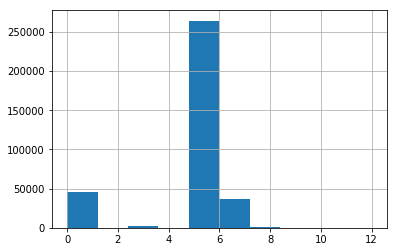

In [23]:
for_predict_df_prod['predict_rf'].hist()

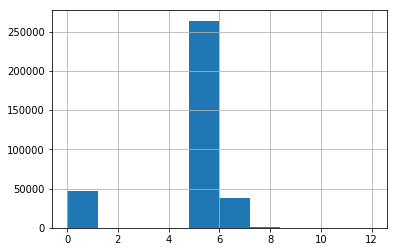

In [24]:
for_predict_df_prod['predict_cb'].hist()

In [13]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    reg = RandomForestClassifier(random_state = 18, bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

    OVR = OneVsRestClassifier(reg,n_jobs=-1)
    OVR.fit(train, labels)
    
    p(labels, OVR.predict(train).round())
    p_cross_val(OVR, train, labels)
    return OVR

prod_OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

RMSE ошибка равна 0.030350194552529183
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       233
           1       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        85
           5       1.00      1.00      1.00      1316
           7       1.00      1.00      1.00       635
           8       1.00      1.00      1.00       110
          12       1.00      1.00      1.00       105

   micro avg       1.00      1.00      1.00      2570
   macro avg       1.00      1.00      1.00      2570
weighted avg       1.00      1.00      1.00      2570

cross_val_predict
              precision    recall  f1-score   support

           0       0.39      0.40      0.39       233
           1       0.83      0.72      0.77        86
           3       0.58      0.71      0.64        85
           5       0.78      0.78      0.78      1316
           7       0.53      0.52      0.52       635
           8       0.

In [16]:
def get_catBoost_GridSearchCV_prod(train, labels):
    from catboost import CatBoostClassifier, Pool
     
    model = CatBoostClassifier(iterations=108,
                               depth=10,
                               loss_function='MultiClass',
                           logging_level='Silent')
    model.fit(train, labels)
    p_cross_val(model, train, labels)

    return model
    
catboost_GridSearchCV_model_best_prod = get_catBoost_GridSearchCV_prod(features, target_facies)

cross_val_predict
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       233
           1       0.97      0.70      0.81        86
           3       0.83      0.24      0.37        85
           5       0.76      0.81      0.79      1316
           7       0.60      0.67      0.63       635
           8       0.65      0.64      0.65       110
          12       0.89      0.55      0.68       105

   micro avg       0.70      0.70      0.70      2570
   macro avg       0.75      0.58      0.63      2570
weighted avg       0.71      0.70      0.70      2570



In [19]:
for_predict_df_prod['predict_rf'] = prod_OneVsRest_RandomForest_model.predict(for_predict_df)
for_predict_df_prod['predict_cb'] = catboost_GridSearchCV_model_best_prod.predict(for_predict_df)

for_predict_df_prod.to_csv('predict_facies_test_data.csv', index=False)

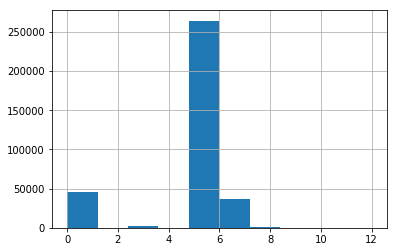

In [20]:
for_predict_df_prod['predict_rf'].hist()

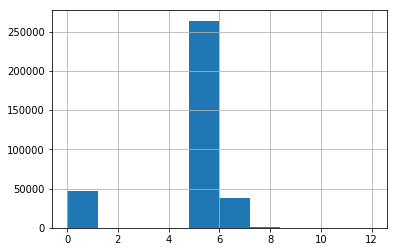

In [21]:
for_predict_df_prod['predict_cb'].hist()